In [ ]:
import json
from datasets import Dataset
from sklearn.model_selection import train_test_split
from transformers import T5Tokenizer
from transformers import T5ForConditionalGeneration, TrainingArguments, Trainer
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd


file_path = 'Project1_Data.json'
with open(file_path, 'r', encoding='utf-8') as file:  # Specify the encoding here
    data = json.load(file)


# Prepare the inputs and labels
inputs = ["context: " + item['text'] + " question: " + item['question'] for item in data]
labels = [str(item['label']) for item in data]  # Convert boolean labels to strings if they are not already

# Split the data into a training set and a testing set (80/20 split)
inputs_train, inputs_test, labels_train, labels_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

# Convert the training and testing data into Dataset objects
train_dict = {'text': inputs_train, 'labels': labels_train}
test_dict = {'text': inputs_test, 'labels': labels_test}
train_dataset = Dataset.from_dict(train_dict)
eval_dataset = Dataset.from_dict(test_dict)

model_name = 't5-small'  # or another T5 version you prefer
tokenizer = T5Tokenizer.from_pretrained(model_name)

def preprocess_function(examples):
    # Tokenize the inputs and labels
    model_inputs = tokenizer(examples['text'], max_length=512, truncation=True, padding="max_length")

    # We need to tokenize the labels as well, T5 expects labels to be provided in the 'input_ids' format
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples['labels'], max_length=512, truncation=True, padding="max_length")

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply the preprocessing function to the training and evaluation datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)

model = T5ForConditionalGeneration.from_pretrained(model_name)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)
trainer.train()

model_name = 't5-small'
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)


text_generator = pipeline("text2text-generation", model=model, tokenizer=tokenizer)


test_texts = ["your test sentence 1", "your test sentence 2"]
true_labels = ["expected answer 1", "expected answer 2"]


predictions = [text_generator(text)[0]['generated_text'] for text in test_texts]


accuracy = accuracy_score(true_labels, predictions)

precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='weighted')


evaluation_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})

print(evaluation_results)

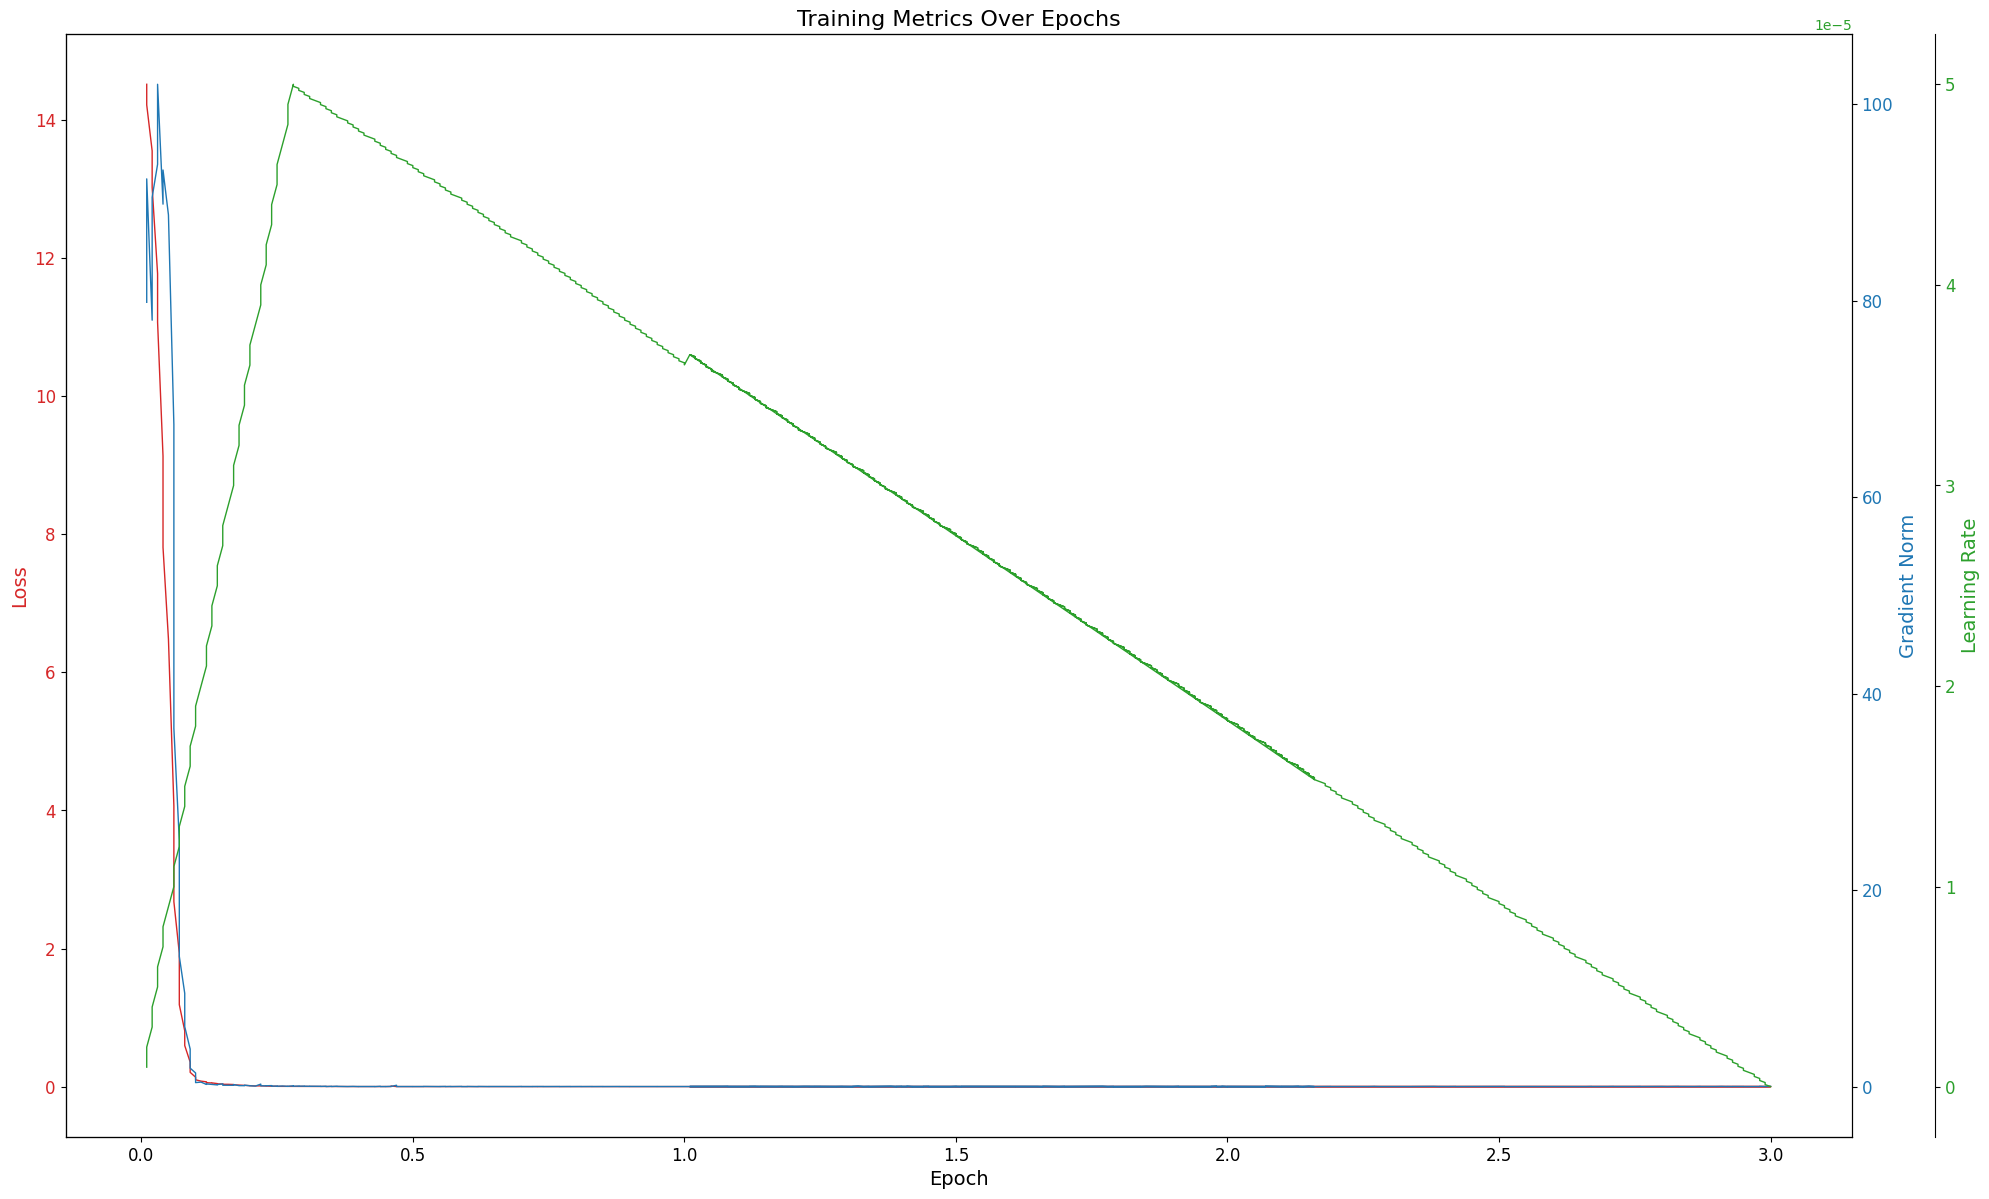

In [19]:
import pandas as pd
import matplotlib.pyplot as plt




data = [

    {'loss': 14.5125, 'grad_norm': 79.84192657470703, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.01},
    {'loss': 14.2142, 'grad_norm': 92.404296875, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.01},
    {'loss': 13.5482, 'grad_norm': 78.01995086669922, 'learning_rate': 3e-06, 'epoch': 0.02},
    {'loss': 13.0194, 'grad_norm': 90.537353515625, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.02},
    {'loss': 11.7706, 'grad_norm': 93.8884506225586, 'learning_rate': 5e-06, 'epoch': 0.03},
    {'loss': 11.0689, 'grad_norm': 102.03397369384766, 'learning_rate': 6e-06, 'epoch': 0.03},
    {'loss': 9.1304, 'grad_norm': 89.832763671875, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.04},
    {'loss': 7.8077, 'grad_norm': 93.30827331542969, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.04},
    {'loss': 6.4815, 'grad_norm': 88.73968505859375, 'learning_rate': 9e-06, 'epoch': 0.05},
    {'loss': 4.0646, 'grad_norm': 67.37921905517578, 'learning_rate': 1e-05, 'epoch': 0.06},
    {'loss': 2.6786, 'grad_norm': 36.4746208190918, 'learning_rate': 1.1000000000000001e-05, 'epoch': 0.06},
    {'loss': 1.9331, 'grad_norm': 25.033512115478516, 'learning_rate': 1.2e-05, 'epoch': 0.07},
    {'loss': 1.1871, 'grad_norm': 13.262860298156738, 'learning_rate': 1.3000000000000001e-05, 'epoch': 0.07},
    {'loss': 0.8088, 'grad_norm': 9.497718811035156, 'learning_rate': 1.4000000000000001e-05, 'epoch': 0.08},
    {'loss': 0.5948, 'grad_norm': 6.10555362701416, 'learning_rate': 1.5e-05, 'epoch': 0.08},
    {'loss': 0.3558, 'grad_norm': 3.8248348236083984, 'learning_rate': 1.6000000000000003e-05, 'epoch': 0.09},
    {'loss': 0.2074, 'grad_norm': 1.882835030555725, 'learning_rate': 1.7000000000000003e-05, 'epoch': 0.09},
    {'loss': 0.1371, 'grad_norm': 1.3938194513320923, 'learning_rate': 1.8e-05, 'epoch': 0.1},
    {'loss': 0.0997, 'grad_norm': 0.4119718372821808, 'learning_rate': 1.9e-05, 'epoch': 0.1},
    {'loss': 0.08, 'grad_norm': 0.46238693594932556, 'learning_rate': 2e-05, 'epoch': 0.11},
    {'loss': 0.0701, 'grad_norm': 0.2247999757528305, 'learning_rate': 2.1e-05, 'epoch': 0.12},
    {'loss': 0.0572, 'grad_norm': 0.2760967016220093, 'learning_rate': 2.2000000000000003e-05, 'epoch': 0.12},
    {'loss': 0.0533, 'grad_norm': 0.23453985154628754, 'learning_rate': 2.3000000000000003e-05, 'epoch': 0.13},
    {'loss': 0.0546, 'grad_norm': 0.2268010526895523, 'learning_rate': 2.4e-05, 'epoch': 0.13},
    {'loss': 0.0445, 'grad_norm': 0.1758556216955185, 'learning_rate': 2.5e-05, 'epoch': 0.14},
    {'loss': 0.0406, 'grad_norm': 0.20858637988567352, 'learning_rate': 2.6000000000000002e-05, 'epoch': 0.14},
    {'loss': 0.0388, 'grad_norm': 0.28297391533851624, 'learning_rate': 2.7000000000000002e-05, 'epoch': 0.15},
    {'loss': 0.0344, 'grad_norm': 0.14395014941692352, 'learning_rate': 2.8000000000000003e-05, 'epoch': 0.15},
    {'loss': 0.034, 'grad_norm': 0.13654087483882904, 'learning_rate': 2.9e-05, 'epoch': 0.16},
    {'loss': 0.031, 'grad_norm': 0.1370176523923874, 'learning_rate': 3e-05, 'epoch': 0.17},
    {'loss': 0.0272, 'grad_norm': 0.20834150910377502, 'learning_rate': 3.1e-05, 'epoch': 0.17},
    {'loss': 0.0232, 'grad_norm': 0.1145276352763176, 'learning_rate': 3.2000000000000005e-05, 'epoch': 0.18},
    {'loss': 0.0228, 'grad_norm': 0.10337116569280624, 'learning_rate': 3.3e-05, 'epoch': 0.18},
    {'loss': 0.0204, 'grad_norm': 0.09941074997186661, 'learning_rate': 3.4000000000000007e-05, 'epoch': 0.19},
    {'loss': 0.0178, 'grad_norm': 0.15284991264343262, 'learning_rate': 3.5e-05, 'epoch': 0.19},
    {'loss': 0.0147, 'grad_norm': 0.09310027211904526, 'learning_rate': 3.6e-05, 'epoch': 0.2},
    {'loss': 0.0135, 'grad_norm': 0.0903635248541832, 'learning_rate': 3.7e-05, 'epoch': 0.2},
    {'loss': 0.0109, 'grad_norm': 0.05671262741088867, 'learning_rate': 3.8e-05, 'epoch': 0.21},
    {'loss': 0.0112, 'grad_norm': 0.25940635800361633, 'learning_rate': 3.9000000000000006e-05, 'epoch': 0.22},
    {'loss': 0.0118, 'grad_norm': 0.08503036946058273, 'learning_rate': 4e-05, 'epoch': 0.22},
    {'loss': 0.0088, 'grad_norm': 0.08169706165790558, 'learning_rate': 4.1e-05, 'epoch': 0.23},
    {'loss': 0.008, 'grad_norm': 0.08995372802019119, 'learning_rate': 4.2e-05, 'epoch': 0.23},
    {'loss': 0.0064, 'grad_norm': 0.10698028653860092, 'learning_rate': 4.3e-05, 'epoch': 0.24},
    {'loss': 0.0064, 'grad_norm': 0.05112872272729874, 'learning_rate': 4.4000000000000006e-05, 'epoch': 0.24},
    {'loss': 0.0065, 'grad_norm': 0.0620158426463604, 'learning_rate': 4.5e-05, 'epoch': 0.25},
    {'loss': 0.0047, 'grad_norm': 0.04082049801945686, 'learning_rate': 4.600000000000001e-05, 'epoch': 0.25},
    {'loss': 0.0044, 'grad_norm': 0.06638150662183762, 'learning_rate': 4.7e-05, 'epoch': 0.26},
    {'loss': 0.0046, 'grad_norm': 0.031814269721508026, 'learning_rate': 4.8e-05, 'epoch': 0.27},
    {'loss': 0.0042, 'grad_norm': 0.03861193731427193, 'learning_rate': 4.9e-05, 'epoch': 0.27},
    {'loss': 0.0035, 'grad_norm': 0.08685654401779175, 'learning_rate': 5e-05, 'epoch': 0.28},
    {'loss': 0.0034, 'grad_norm': 0.04089045524597168, 'learning_rate': 4.989864180012163e-05, 'epoch': 0.28},
    {'loss': 0.0032, 'grad_norm': 0.06230849027633667, 'learning_rate': 4.979728360024326e-05, 'epoch': 0.29},
    {'loss': 0.0036, 'grad_norm': 0.048540595918893814, 'learning_rate': 4.969592540036489e-05, 'epoch': 0.29},
    {'loss': 0.0025, 'grad_norm': 0.05609220266342163, 'learning_rate': 4.9594567200486516e-05, 'epoch': 0.3},
    {'loss': 0.0028, 'grad_norm': 0.04453359171748161, 'learning_rate': 4.9493209000608156e-05, 'epoch': 0.3},
    {'loss': 0.0026, 'grad_norm': 0.03621742129325867, 'learning_rate': 4.939185080072978e-05, 'epoch': 0.31},
    {'loss': 0.0024, 'grad_norm': 0.04242057725787163, 'learning_rate': 4.929049260085141e-05, 'epoch': 0.31},
    {'loss': 0.0026, 'grad_norm': 0.04083755984902382, 'learning_rate': 4.9189134400973043e-05, 'epoch': 0.32},
    {'loss': 0.0026, 'grad_norm': 0.03637298569083214, 'learning_rate': 4.908777620109467e-05, 'epoch': 0.33},
    {'loss': 0.0022, 'grad_norm': 0.024982664734125137, 'learning_rate': 4.89864180012163e-05, 'epoch': 0.33},
    {'loss': 0.0025, 'grad_norm': 0.043068572878837585, 'learning_rate': 4.888505980133793e-05, 'epoch': 0.34},
    {'loss': 0.002, 'grad_norm': 0.009509737603366375, 'learning_rate': 4.878370160145956e-05, 'epoch': 0.34},
    {'loss': 0.0023, 'grad_norm': 0.036267735064029694, 'learning_rate': 4.868234340158119e-05, 'epoch': 0.35},
    {'loss': 0.0017, 'grad_norm': 0.014825643040239811, 'learning_rate': 4.8580985201702824e-05, 'epoch': 0.35},
    {'loss': 0.002, 'grad_norm': 0.04212871938943863, 'learning_rate': 4.847962700182445e-05, 'epoch': 0.36},
    {'loss': 0.0016, 'grad_norm': 0.028426488861441612, 'learning_rate': 4.837826880194608e-05, 'epoch': 0.36},
    {'loss': 0.0019, 'grad_norm': 0.017570124939084053, 'learning_rate': 4.827691060206771e-05, 'epoch': 0.37},
    {'loss': 0.0019, 'grad_norm': 0.0171519722789526, 'learning_rate': 4.817555240218934e-05, 'epoch': 0.38},
    {'loss': 0.0017, 'grad_norm': 0.011408396996557713, 'learning_rate': 4.8074194202310965e-05, 'epoch': 0.38},
    {'loss': 0.0019, 'grad_norm': 0.018362928181886673, 'learning_rate': 4.79728360024326e-05, 'epoch': 0.39},
    {'loss': 0.0019, 'grad_norm': 0.025239191949367523, 'learning_rate': 4.7871477802554225e-05, 'epoch': 0.39},
    {'loss': 0.0017, 'grad_norm': 0.009742554277181625, 'learning_rate': 4.777011960267586e-05, 'epoch': 0.4},
    {'loss': 0.0015, 'grad_norm': 0.01355693954974413, 'learning_rate': 4.766876140279749e-05, 'epoch': 0.4},
    {'loss': 0.0016, 'grad_norm': 0.015576192177832127, 'learning_rate': 4.756740320291912e-05, 'epoch': 0.41},
    {'loss': 0.0015, 'grad_norm': 0.0070237889885902405, 'learning_rate': 4.7466045003040746e-05, 'epoch': 0.41},
    {'loss': 0.0017, 'grad_norm': 0.012268532067537308, 'learning_rate': 4.736468680316238e-05, 'epoch': 0.42},
    {'loss': 0.0013, 'grad_norm': 0.013101162388920784, 'learning_rate': 4.7263328603284006e-05, 'epoch': 0.43},
    {'loss': 0.0015, 'grad_norm': 0.0052309902384877205, 'learning_rate': 4.716197040340564e-05, 'epoch': 0.43},
    {'loss': 0.0017, 'grad_norm': 0.03588199242949486, 'learning_rate': 4.7060612203527266e-05, 'epoch': 0.44},
    {'loss': 0.0015, 'grad_norm': 0.00809803232550621, 'learning_rate': 4.695925400364889e-05, 'epoch': 0.44},
    {'loss': 0.0016, 'grad_norm': 0.011500188149511814, 'learning_rate': 4.6857895803770526e-05, 'epoch': 0.45},
    {'loss': 0.0014, 'grad_norm': 0.008776364848017693, 'learning_rate': 4.675653760389216e-05, 'epoch': 0.45},
    {'loss': 0.0018, 'grad_norm': 0.02912975288927555, 'learning_rate': 4.665517940401379e-05, 'epoch': 0.46},
    {'loss': 0.0094, 'grad_norm': 0.02313794568181038, 'learning_rate': 4.655382120413542e-05, 'epoch': 0.46},
    {'loss': 0.0014, 'grad_norm': 0.14206409454345703, 'learning_rate': 4.645246300425705e-05, 'epoch': 0.47},
    {'loss': 0.0014, 'grad_norm': 0.012076195329427719, 'learning_rate': 4.6351104804378674e-05, 'epoch': 0.47},
    {'loss': 0.0015, 'grad_norm': 0.01434638537466526, 'learning_rate': 4.624974660450031e-05, 'epoch': 0.48},
    {'loss': 0.0017, 'grad_norm': 0.015306566841900349, 'learning_rate': 4.6148388404621934e-05, 'epoch': 0.49},
    {'loss': 0.0015, 'grad_norm': 0.010823856107890606, 'learning_rate': 4.604703020474357e-05, 'epoch': 0.49},
    {'loss': 0.0016, 'grad_norm': 0.011451237834990025, 'learning_rate': 4.59456720048652e-05, 'epoch': 0.5},
    {'loss': 0.0014, 'grad_norm': 0.00981890968978405, 'learning_rate': 4.584431380498683e-05, 'epoch': 0.5},
    {'loss': 0.0015, 'grad_norm': 0.009117812849581242, 'learning_rate': 4.5742955605108455e-05, 'epoch': 0.51},
    {'loss': 0.0015, 'grad_norm': 0.01486175786703825, 'learning_rate': 4.564159740523009e-05, 'epoch': 0.51},
    {'loss': 0.0015, 'grad_norm': 0.012149388901889324, 'learning_rate': 4.5540239205351715e-05, 'epoch': 0.52},
    {'loss': 0.0017, 'grad_norm': 0.022552914917469025, 'learning_rate': 4.543888100547334e-05, 'epoch': 0.52},
    {'loss': 0.0015, 'grad_norm': 0.01575782522559166, 'learning_rate': 4.5337522805594975e-05, 'epoch': 0.53},
    {'loss': 0.0014, 'grad_norm': 0.010924228467047215, 'learning_rate': 4.52361646057166e-05, 'epoch': 0.54},
    {'loss': 0.0012, 'grad_norm': 0.01206179615110159, 'learning_rate': 4.5134806405838235e-05, 'epoch': 0.54},
    {'loss': 0.0014, 'grad_norm': 0.009099186398088932, 'learning_rate': 4.503344820595987e-05, 'epoch': 0.55},
    {'loss': 0.0013, 'grad_norm': 0.014225298538804054, 'learning_rate': 4.4932090006081496e-05, 'epoch': 0.55},
    {'loss': 0.0013, 'grad_norm': 0.02205442078411579, 'learning_rate': 4.483073180620312e-05, 'epoch': 0.56},
    {'loss': 0.0011, 'grad_norm': 0.007377476431429386, 'learning_rate': 4.4729373606324756e-05, 'epoch': 0.56},
    {'loss': 0.0015, 'grad_norm': 0.020159319043159485, 'learning_rate': 4.462801540644638e-05, 'epoch': 0.57},
    {'loss': 0.0015, 'grad_norm': 0.00794300902634859, 'learning_rate': 4.452665720656801e-05, 'epoch': 0.57},
    {'loss': 0.0013, 'grad_norm': 0.01207145769149065, 'learning_rate': 4.442529900668964e-05, 'epoch': 0.58},
    {'loss': 0.0016, 'grad_norm': 0.02292621321976185, 'learning_rate': 4.432394080681127e-05, 'epoch': 0.59},
    {'loss': 0.0013, 'grad_norm': 0.007716663647443056, 'learning_rate': 4.42225826069329e-05, 'epoch': 0.59},
    {'loss': 0.0014, 'grad_norm': 0.006433673202991486, 'learning_rate': 4.412122440705454e-05, 'epoch': 0.6},
    {'loss': 0.0014, 'grad_norm': 0.020089833438396454, 'learning_rate': 4.401986620717616e-05, 'epoch': 0.6},
    {'loss': 0.0011, 'grad_norm': 0.00781967919319868, 'learning_rate': 4.391850800729779e-05, 'epoch': 0.61},
    {'loss': 0.0013, 'grad_norm': 0.01121574491262436, 'learning_rate': 4.381714980741942e-05, 'epoch': 0.61},
    {'loss': 0.0012, 'grad_norm': 0.005436898395419121, 'learning_rate': 4.371579160754105e-05, 'epoch': 0.62},
    {'loss': 0.0015, 'grad_norm': 0.020107341185212135, 'learning_rate': 4.361443340766268e-05, 'epoch': 0.62},
    {'loss': 0.0012, 'grad_norm': 0.010255905613303185, 'learning_rate': 4.351307520778431e-05, 'epoch': 0.63},
    {'loss': 0.0014, 'grad_norm': 0.020250722765922546, 'learning_rate': 4.341171700790594e-05, 'epoch': 0.63},
    {'loss': 0.0013, 'grad_norm': 0.009444980718195438, 'learning_rate': 4.331035880802757e-05, 'epoch': 0.64},
    {'loss': 0.0011, 'grad_norm': 0.013538543321192265, 'learning_rate': 4.32090006081492e-05, 'epoch': 0.64},
    {'loss': 0.0012, 'grad_norm': 0.016125081479549408, 'learning_rate': 4.310764240827083e-05, 'epoch': 0.65},
    {'loss': 0.0012, 'grad_norm': 0.008950840473175049, 'learning_rate': 4.300628420839246e-05, 'epoch': 0.65},
    {'loss': 0.0014, 'grad_norm': 0.018459586799144745, 'learning_rate': 4.290492600851409e-05, 'epoch': 0.66},
    {'loss': 0.0011, 'grad_norm': 0.00783093124628067, 'learning_rate': 4.280356780863572e-05, 'epoch': 0.66},
    {'loss': 0.0012, 'grad_norm': 0.012295782007277012, 'learning_rate': 4.270220960875735e-05, 'epoch': 0.67},
    {'loss': 0.0012, 'grad_norm': 0.014660183131694794, 'learning_rate': 4.260085140887898e-05, 'epoch': 0.67},
    {'loss': 0.0011, 'grad_norm': 0.009264058805465698, 'learning_rate': 4.249949320900061e-05, 'epoch': 0.68},
    {'loss': 0.0012, 'grad_norm': 0.018604403734207153, 'learning_rate': 4.239813500912224e-05, 'epoch': 0.68},
    {'loss': 0.0013, 'grad_norm': 0.009918591380119324, 'learning_rate': 4.229677680924387e-05, 'epoch': 0.69},
    {'loss': 0.0013, 'grad_norm': 0.019428616762161255, 'learning_rate': 4.21954186093655e-05, 'epoch': 0.7},
    {'loss': 0.0012, 'grad_norm': 0.011349722742080688, 'learning_rate': 4.209406040948713e-05, 'epoch': 0.7},
    {'loss': 0.0011, 'grad_norm': 0.008765121176838875, 'learning_rate': 4.199270220960876e-05, 'epoch': 0.71},
    {'loss': 0.0013, 'grad_norm': 0.019566600024700165, 'learning_rate': 4.189134400973039e-05, 'epoch': 0.71},
    {'loss': 0.0013, 'grad_norm': 0.010178524255752563, 'learning_rate': 4.178998580985202e-05, 'epoch': 0.72},
    {'loss': 0.0011, 'grad_norm': 0.013680750131607056, 'learning_rate': 4.168862760997365e-05, 'epoch': 0.72},
    {'loss': 0.0012, 'grad_norm': 0.01828170008957386, 'learning_rate': 4.158726941009528e-05, 'epoch': 0.73},
    {'loss': 0.0011, 'grad_norm': 0.00950292944908142, 'learning_rate': 4.148591121021691e-05, 'epoch': 0.73},
    {'loss': 0.0012, 'grad_norm': 0.016852635890245438, 'learning_rate': 4.138455301033854e-05, 'epoch': 0.74},
    {'loss': 0.0011, 'grad_norm': 0.01067516803741455, 'learning_rate': 4.128319481046017e-05, 'epoch': 0.74},
    {'loss': 0.0012, 'grad_norm': 0.014714868925511837, 'learning_rate': 4.11818366105818e-05, 'epoch': 0.75},
    {'loss': 0.0011, 'grad_norm': 0.009261182136833668, 'learning_rate': 4.108047841070343e-05, 'epoch': 0.75},
    {'loss': 0.0012, 'grad_norm': 0.01759326457977295, 'learning_rate': 4.097912021082506e-05, 'epoch': 0.76},
    {'loss': 0.0011, 'grad_norm': 0.010145572945475578, 'learning_rate': 4.087776201094669e-05, 'epoch': 0.76},
    {'loss': 0.0012, 'grad_norm': 0.015812456607818603, 'learning_rate': 4.077640381106832e-05, 'epoch': 0.77},
    {'loss': 0.0011, 'grad_norm': 0.009457721561193466, 'learning_rate': 4.067504561118995e-05, 'epoch': 0.77},
    {'loss': 0.0012, 'grad_norm': 0.01724029593169689, 'learning_rate': 4.057368741131158e-05, 'epoch': 0.78},
    {'loss': 0.0011, 'grad_norm': 0.01066792756319046, 'learning_rate': 4.047232921143321e-05, 'epoch': 0.78},
    {'loss': 0.0012, 'grad_norm': 0.015399911627173424, 'learning_rate': 4.037097101155484e-05, 'epoch': 0.79},
    {'loss': 0.0011, 'grad_norm': 0.009674843214452267, 'learning_rate': 4.026961281167647e-05, 'epoch': 0.79},
    {'loss': 0.0012, 'grad_norm': 0.01698339954018593, 'learning_rate': 4.01682546117981e-05, 'epoch': 0.8},
    {'loss': 0.0011, 'grad_norm': 0.01089005821943283, 'learning_rate': 4.006689641191973e-05, 'epoch': 0.8},
    {'loss': 0.0012, 'grad_norm': 0.015006948843598366, 'learning_rate': 3.996553821204136e-05, 'epoch': 0.81},
    {'loss': 0.0011, 'grad_norm': 0.009891552850604057, 'learning_rate': 3.986418001216299e-05, 'epoch': 0.81},
    {'loss': 0.0012, 'grad_norm': 0.01657678335905075, 'learning_rate': 3.976282181228462e-05, 'epoch': 0.82},
    {'loss': 0.0011, 'grad_norm': 0.01111219972372055, 'learning_rate': 3.966146361240625e-05, 'epoch': 0.82},
    {'loss': 0.0012, 'grad_norm': 0.014614189229905605, 'learning_rate': 3.956010541252788e-05, 'epoch': 0.83},
    {'loss': 0.0011, 'grad_norm': 0.010108080133795738, 'learning_rate': 3.945874721264951e-05, 'epoch': 0.83},
    {'loss': 0.0012, 'grad_norm': 0.016170168295502663, 'learning_rate': 3.935738901277114e-05, 'epoch': 0.84},
    {'loss': 0.0011, 'grad_norm': 0.011334072239160538, 'learning_rate': 3.925603081289277e-05, 'epoch': 0.84},
    {'loss': 0.0012, 'grad_norm': 0.014221588149666786, 'learning_rate': 3.91546726130144e-05, 'epoch': 0.85},
    {'loss': 0.0011, 'grad_norm': 0.010324681364536285, 'learning_rate': 3.905331441313603e-05, 'epoch': 0.85},
    {'loss': 0.0012, 'grad_norm': 0.015763762220740318, 'learning_rate': 3.895195621325766e-05, 'epoch': 0.86},
    {'loss': 0.0011, 'grad_norm': 0.01155576054006815, 'learning_rate': 3.885059801337929e-05, 'epoch': 0.86},
    {'loss': 0.0012, 'grad_norm': 0.013829029724001885, 'learning_rate': 3.874923981350092e-05, 'epoch': 0.87},
    {'loss': 0.0011, 'grad_norm': 0.0105411728849411, 'learning_rate': 3.864788161362255e-05, 'epoch': 0.87},
    {'loss': 0.0012, 'grad_norm': 0.015357343666255474, 'learning_rate': 3.854652341374418e-05, 'epoch': 0.88},
    {'loss': 0.0011, 'grad_norm': 0.011777458876371384, 'learning_rate': 3.844516521386581e-05, 'epoch': 0.88},
    {'loss': 0.0012, 'grad_norm': 0.01343665849417448, 'learning_rate': 3.834380701398744e-05, 'epoch': 0.89},
    {'loss': 0.0011, 'grad_norm': 0.010757580399513245, 'learning_rate': 3.824244881410907e-05, 'epoch': 0.89},
    {'loss': 0.0012, 'grad_norm': 0.014951041735708714, 'learning_rate': 3.81410906142307e-05, 'epoch': 0.9},
    {'loss': 0.0011, 'grad_norm': 0.011999068222939968, 'learning_rate': 3.803973241435233e-05, 'epoch': 0.9},
    {'loss': 0.0012, 'grad_norm': 0.013044421188533306, 'learning_rate': 3.793837421447396e-05, 'epoch': 0.91},
    {'loss': 0.0011, 'grad_norm': 0.010974002070724964, 'learning_rate': 3.783701601459559e-05, 'epoch': 0.91},
    {'loss': 0.0012, 'grad_norm': 0.014544628210365772, 'learning_rate': 3.773565781471722e-05, 'epoch': 0.92},
    {'loss': 0.0011, 'grad_norm': 0.012220626324415207, 'learning_rate': 3.763429961483885e-05, 'epoch': 0.92},
    {'loss': 0.0012, 'grad_norm': 0.01265244074165821, 'learning_rate': 3.753294141496048e-05, 'epoch': 0.93},
    {'loss': 0.0011, 'grad_norm': 0.011190452054142952, 'learning_rate': 3.743158321508211e-05, 'epoch': 0.93},
    {'loss': 0.0012, 'grad_norm': 0.014138314127922058, 'learning_rate': 3.733022501520374e-05, 'epoch': 0.94},
    {'loss': 0.0011, 'grad_norm': 0.012442197859287262, 'learning_rate': 3.722886681532537e-05, 'epoch': 0.94},
    {'loss': 0.0012, 'grad_norm': 0.01226050965487957, 'learning_rate': 3.7127508615447e-05, 'epoch': 0.95},
    {'loss': 0.0011, 'grad_norm': 0.011407002806663513, 'learning_rate': 3.702615041556863e-05, 'epoch': 0.95},
    {'loss': 0.0012, 'grad_norm': 0.013732120744884014, 'learning_rate': 3.692479221569026e-05, 'epoch': 0.96},
    {'loss': 0.0011, 'grad_norm': 0.012663791865110397, 'learning_rate': 3.682343401581189e-05, 'epoch': 0.96},
    {'loss': 0.0012, 'grad_norm': 0.011868490278720856, 'learning_rate': 3.672207581593352e-05, 'epoch': 0.97},
    {'loss': 0.0011, 'grad_norm': 0.011623519077897072, 'learning_rate': 3.662071761605515e-05, 'epoch': 0.97},
    {'loss': 0.0012, 'grad_norm': 0.013325848802924156, 'learning_rate': 3.651935941617678e-05, 'epoch': 0.98},
    {'loss': 0.0011, 'grad_norm': 0.01288549767434597, 'learning_rate': 3.641800121629841e-05, 'epoch': 0.98},
    {'loss': 0.0012, 'grad_norm': 0.011476486712694168, 'learning_rate': 3.631664301642004e-05, 'epoch': 0.99},
    {'loss': 0.0011, 'grad_norm': 0.01184004545211792, 'learning_rate': 3.621528481654167e-05, 'epoch': 0.99},
    {'loss': 0.0012, 'grad_norm': 0.012919653207063675, 'learning_rate': 3.61139266166633e-05, 'epoch': 1.0},
    {'loss': 0.0011, 'grad_norm': 0.013107191771268845, 'learning_rate': 3.601256841678493e-05, 'epoch': 1.0},
    {'loss': 0.0012, 'grad_norm': 0.01332449447363615, 'learning_rate': 3.6519359416176766e-05, 'epoch': 1.01},
    {'loss': 0.0011, 'grad_norm': 0.014700863510370255, 'learning_rate': 3.64180012162984e-05, 'epoch': 1.02},
    {'loss': 0.0013, 'grad_norm': 0.011364771053195, 'learning_rate': 3.631664301642003e-05, 'epoch': 1.02},
    {'loss': 0.0011, 'grad_norm': 0.01116875372827053, 'learning_rate': 3.621528481654166e-05, 'epoch': 1.03},
    {'loss': 0.0013, 'grad_norm': 0.004632575437426567, 'learning_rate': 3.6113926616663294e-05, 'epoch': 1.03},
    {'loss': 0.0013, 'grad_norm': 0.02371875010430813, 'learning_rate': 3.601256841678492e-05, 'epoch': 1.04},
    {'loss': 0.0014, 'grad_norm': 0.006520617753267288, 'learning_rate': 3.591121021690655e-05, 'epoch': 1.04},
    {'loss': 0.0013, 'grad_norm': 0.020639795809984207, 'learning_rate': 3.580985201702818e-05, 'epoch': 1.05},
    {'loss': 0.0012, 'grad_norm': 0.007497961632907391, 'learning_rate': 3.570849381714981e-05, 'epoch': 1.05},
    {'loss': 0.0013, 'grad_norm': 0.006289420649409294, 'learning_rate': 3.5607135617271434e-05, 'epoch': 1.06},
    {'loss': 0.0014, 'grad_norm': 0.007817438803613186, 'learning_rate': 3.5505777417393074e-05, 'epoch': 1.07},
    {'loss': 0.0014, 'grad_norm': 0.017578568309545517, 'learning_rate': 3.54044192175147e-05, 'epoch': 1.07},
    {'loss': 0.0012, 'grad_norm': 0.024682259187102318, 'learning_rate': 3.530306101763633e-05, 'epoch': 1.08},
    {'loss': 0.0014, 'grad_norm': 0.007918396033346653, 'learning_rate': 3.520170281775796e-05, 'epoch': 1.08},
    {'loss': 0.0014, 'grad_norm': 0.011038710363209248, 'learning_rate': 3.510034461787959e-05, 'epoch': 1.09},
    {'loss': 0.0011, 'grad_norm': 0.007211056537926197, 'learning_rate': 3.4998986418001215e-05, 'epoch': 1.09},
    {'loss': 0.0011, 'grad_norm': 0.007869699969887733, 'learning_rate': 3.489762821812285e-05, 'epoch': 1.1},
    {'loss': 0.0012, 'grad_norm': 0.008094853721559048, 'learning_rate': 3.4796270018244475e-05, 'epoch': 1.1},
    {'loss': 0.0013, 'grad_norm': 0.006230258382856846, 'learning_rate': 3.46949118183661e-05, 'epoch': 1.11},
    {'loss': 0.0012, 'grad_norm': 0.006752696819603443, 'learning_rate': 3.459355361848774e-05, 'epoch': 1.12},
    {'loss': 0.0012, 'grad_norm': 0.01915486715734005, 'learning_rate': 3.449219541860937e-05, 'epoch': 1.12},
    {'loss': 0.0013, 'grad_norm': 0.0261670108884573, 'learning_rate': 3.4390837218730996e-05, 'epoch': 1.13},
    {'loss': 0.0013, 'grad_norm': 0.017733989283442497, 'learning_rate': 3.428947901885263e-05, 'epoch': 1.13},
    {'loss': 0.0011, 'grad_norm': 0.0076003363355994225, 'learning_rate': 3.4188120818974256e-05, 'epoch': 1.14},
    {'loss': 0.0012, 'grad_norm': 0.015634048730134964, 'learning_rate': 3.408676261909588e-05, 'epoch': 1.14},
    {'loss': 0.0012, 'grad_norm': 0.011758243665099144, 'learning_rate': 3.3985404419217516e-05, 'epoch': 1.15},
    {'loss': 0.0011, 'grad_norm': 0.007393958512693644, 'learning_rate': 3.388404621933914e-05, 'epoch': 1.15},
    {'loss': 0.0013, 'grad_norm': 0.01657075062394142, 'learning_rate': 3.3782688019460777e-05, 'epoch': 1.16},
    {'loss': 0.0014, 'grad_norm': 0.009515151381492615, 'learning_rate': 3.368132981958241e-05, 'epoch': 1.17},
    {'loss': 0.0011, 'grad_norm': 0.008161586709320545, 'learning_rate': 3.357997161970404e-05, 'epoch': 1.17},
    {'loss': 0.0014, 'grad_norm': 0.02001507580280304, 'learning_rate': 3.3478613419825664e-05, 'epoch': 1.18},
    {'loss': 0.0012, 'grad_norm': 0.008958465419709682, 'learning_rate': 3.33772552199473e-05, 'epoch': 1.18},
    {'loss': 0.0011, 'grad_norm': 0.007175666745752096, 'learning_rate': 3.3275897020068924e-05, 'epoch': 1.19},
    {'loss': 0.0012, 'grad_norm': 0.008843702264130116, 'learning_rate': 3.317453882019055e-05, 'epoch': 1.19},
    {'loss': 0.0012, 'grad_norm': 0.01405405718833208, 'learning_rate': 3.3073180620312184e-05, 'epoch': 1.2},
    {'loss': 0.0014, 'grad_norm': 0.005249552428722382, 'learning_rate': 3.297182242043381e-05, 'epoch': 1.2},
    {'loss': 0.0012, 'grad_norm': 0.010370996780693531, 'learning_rate': 3.2870464220555444e-05, 'epoch': 1.21},
    {'loss': 0.0012, 'grad_norm': 0.009778271429240704, 'learning_rate': 3.276910602067708e-05, 'epoch': 1.21},
    {'loss': 0.0013, 'grad_norm': 0.021441392600536346, 'learning_rate': 3.2667747820798705e-05, 'epoch': 1.22},
    {'loss': 0.0013, 'grad_norm': 0.013120691291987896, 'learning_rate': 3.256638962092033e-05, 'epoch': 1.23},
    {'loss': 0.0012, 'grad_norm': 0.008523808792233467, 'learning_rate': 3.2465031421041965e-05, 'epoch': 1.23},
    {'loss': 0.0011, 'grad_norm': 0.013688774779438972, 'learning_rate': 3.236367322116359e-05, 'epoch': 1.24},
    {'loss': 0.0013, 'grad_norm': 0.015745338052511215, 'learning_rate': 3.2262315021285225e-05, 'epoch': 1.24},
    {'loss': 0.0013, 'grad_norm': 0.014920438639819622, 'learning_rate': 3.216095682140685e-05, 'epoch': 1.25},
    {'loss': 0.0013, 'grad_norm': 0.011173760518431664, 'learning_rate': 3.205959862152848e-05, 'epoch': 1.25},
    {'loss': 0.0012, 'grad_norm': 0.007612781133502722, 'learning_rate': 3.195824042165011e-05, 'epoch': 1.26},
    {'loss': 0.0012, 'grad_norm': 0.006607158109545708, 'learning_rate': 3.1856882221771746e-05, 'epoch': 1.26},
    {'loss': 0.0013, 'grad_norm': 0.007108001504093409, 'learning_rate': 3.175552402189337e-05, 'epoch': 1.27},
    {'loss': 0.0012, 'grad_norm': 0.007341077085584402, 'learning_rate': 3.1654165822015006e-05, 'epoch': 1.28},
    {'loss': 0.0013, 'grad_norm': 0.008513756096363068, 'learning_rate': 3.155280762213663e-05, 'epoch': 1.28},
    {'loss': 0.0011, 'grad_norm': 0.019731061533093452, 'learning_rate': 3.145144942225826e-05, 'epoch': 1.29},
    {'loss': 0.0013, 'grad_norm': 0.014722434803843498, 'learning_rate': 3.135009122237989e-05, 'epoch': 1.29},
    {'loss': 0.0012, 'grad_norm': 0.007629021070897579, 'learning_rate': 3.124873302250152e-05, 'epoch': 1.3},
    {'loss': 0.0012, 'grad_norm': 0.016013963147997856, 'learning_rate': 3.114737482262315e-05, 'epoch': 1.3},
    {'loss': 0.0012, 'grad_norm': 0.005413759965449572, 'learning_rate': 3.104601662274479e-05, 'epoch': 1.31},
    {'loss': 0.0011, 'grad_norm': 0.015516692772507668, 'learning_rate': 3.0944658422866414e-05, 'epoch': 1.31},
    {'loss': 0.0014, 'grad_norm': 0.03148890659213066, 'learning_rate': 3.084330022298804e-05, 'epoch': 1.32},
    {'loss': 0.0013, 'grad_norm': 0.0075226277112960815, 'learning_rate': 3.0741942023109674e-05, 'epoch': 1.33},
    {'loss': 0.0011, 'grad_norm': 0.006367574445903301, 'learning_rate': 3.06405838232313e-05, 'epoch': 1.33},
    {'loss': 0.0013, 'grad_norm': 0.015108768828213215, 'learning_rate': 3.053922562335293e-05, 'epoch': 1.34},
    {'loss': 0.0011, 'grad_norm': 0.006945593282580376, 'learning_rate': 3.0437867423474557e-05, 'epoch': 1.34},
    {'loss': 0.0012, 'grad_norm': 0.010760699398815632, 'learning_rate': 3.0336509223596188e-05, 'epoch': 1.35},
    {'loss': 0.0012, 'grad_norm': 0.0078939413651824, 'learning_rate': 3.023515102371782e-05, 'epoch': 1.35},
    {'loss': 0.0012, 'grad_norm': 0.008738843724131584, 'learning_rate': 3.013379282383945e-05, 'epoch': 1.36},
    {'loss': 0.0013, 'grad_norm': 0.01843574270606041, 'learning_rate': 3.003243462396108e-05, 'epoch': 1.36},
    {'loss': 0.0011, 'grad_norm': 0.02144244685769081, 'learning_rate': 2.993107642408271e-05, 'epoch': 1.37},
    {'loss': 0.0012, 'grad_norm': 0.016999447718262672, 'learning_rate': 2.9829718224204338e-05, 'epoch': 1.37},
    {'loss': 0.0013, 'grad_norm': 0.024158816784620285, 'learning_rate': 2.972836002432597e-05, 'epoch': 1.38},
    {'loss': 0.0011, 'grad_norm': 0.006257387809455395, 'learning_rate': 2.96270018244476e-05, 'epoch': 1.39},
    {'loss': 0.0012, 'grad_norm': 0.013041983358561993, 'learning_rate': 2.9525643624569225e-05, 'epoch': 1.39},
    {'loss': 0.0015, 'grad_norm': 0.01921055093407631, 'learning_rate': 2.9424285424690855e-05, 'epoch': 1.4},
    {'loss': 0.0013, 'grad_norm': 0.011776397004723549, 'learning_rate': 2.9322927224812492e-05, 'epoch': 1.4},
    {'loss': 0.0015, 'grad_norm': 0.01180706825107336, 'learning_rate': 2.922156902493412e-05, 'epoch': 1.41},
    {'loss': 0.0012, 'grad_norm': 0.026912452653050423, 'learning_rate': 2.912021082505575e-05, 'epoch': 1.41},
    {'loss': 0.0012, 'grad_norm': 0.007917958311736584, 'learning_rate': 2.901885262517738e-05, 'epoch': 1.42},
    {'loss': 0.0011, 'grad_norm': 0.008093442767858505, 'learning_rate': 2.8917494425299006e-05, 'epoch': 1.42},
    {'loss': 0.0012, 'grad_norm': 0.006776370108127594, 'learning_rate': 2.8816136225420636e-05, 'epoch': 1.43},
    {'loss': 0.0012, 'grad_norm': 0.0068070730194449425, 'learning_rate': 2.8714778025542266e-05, 'epoch': 1.44},
    {'loss': 0.0011, 'grad_norm': 0.015555796213448048, 'learning_rate': 2.8613419825663897e-05, 'epoch': 1.44},
    {'loss': 0.0012, 'grad_norm': 0.018791235983371735, 'learning_rate': 2.851206162578553e-05, 'epoch': 1.45},
    {'loss': 0.0012, 'grad_norm': 0.008379151113331318, 'learning_rate': 2.841070342590716e-05, 'epoch': 1.45},
    {'loss': 0.0011, 'grad_norm': 0.007295800372958183, 'learning_rate': 2.8309345226028787e-05, 'epoch': 1.46},
    {'loss': 0.0012, 'grad_norm': 0.008782131597399712, 'learning_rate': 2.8207987026150417e-05, 'epoch': 1.46},
    {'loss': 0.0011, 'grad_norm': 0.008494511246681213, 'learning_rate': 2.8106628826272047e-05, 'epoch': 1.47},
    {'loss': 0.0012, 'grad_norm': 0.011515737511217594, 'learning_rate': 2.8005270626393677e-05, 'epoch': 1.47},
    {'loss': 0.001, 'grad_norm': 0.01332958322018385, 'learning_rate': 2.7903912426515304e-05, 'epoch': 1.48},
    {'loss': 0.0012, 'grad_norm': 0.0088635990396142, 'learning_rate': 2.7802554226636934e-05, 'epoch': 1.49},
    {'loss': 0.0011, 'grad_norm': 0.007710631005465984, 'learning_rate': 2.7701196026758564e-05, 'epoch': 1.49},
    {'loss': 0.0012, 'grad_norm': 0.018930813297629356, 'learning_rate': 2.7599837826880198e-05, 'epoch': 1.5},
    {'loss': 0.0011, 'grad_norm': 0.014110639691352844, 'learning_rate': 2.7498479627001828e-05, 'epoch': 1.5},
    {'loss': 0.0013, 'grad_norm': 0.008804026059806347, 'learning_rate': 2.7397121427123458e-05, 'epoch': 1.51},
    {'loss': 0.0012, 'grad_norm': 0.015965471044182777, 'learning_rate': 2.7295763227245085e-05, 'epoch': 1.51},
    {'loss': 0.0012, 'grad_norm': 0.01607438363134861, 'learning_rate': 2.7194405027366715e-05, 'epoch': 1.52},
    {'loss': 0.0011, 'grad_norm': 0.026102200150489807, 'learning_rate': 2.7093046827488345e-05, 'epoch': 1.52},
    {'loss': 0.0012, 'grad_norm': 0.006850492209196091, 'learning_rate': 2.6991688627609972e-05, 'epoch': 1.53},
    {'loss': 0.0013, 'grad_norm': 0.010350055061280727, 'learning_rate': 2.6890330427731602e-05, 'epoch': 1.54},
    {'loss': 0.0011, 'grad_norm': 0.014202757738530636, 'learning_rate': 2.678897222785324e-05, 'epoch': 1.54},
    {'loss': 0.0012, 'grad_norm': 0.01660010777413845, 'learning_rate': 2.6687614027974866e-05, 'epoch': 1.55},
    {'loss': 0.0012, 'grad_norm': 0.011249318718910217, 'learning_rate': 2.6586255828096496e-05, 'epoch': 1.55},
    {'loss': 0.0011, 'grad_norm': 0.007768998853862286, 'learning_rate': 2.6484897628218126e-05, 'epoch': 1.56},
    {'loss': 0.001, 'grad_norm': 0.00799058098345995, 'learning_rate': 2.6383539428339753e-05, 'epoch': 1.56},
    {'loss': 0.0012, 'grad_norm': 0.015536179766058922, 'learning_rate': 2.6282181228461383e-05, 'epoch': 1.57},
    {'loss': 0.001, 'grad_norm': 0.008486572653055191, 'learning_rate': 2.6180823028583013e-05, 'epoch': 1.57},
    {'loss': 0.0012, 'grad_norm': 0.005592741072177887, 'learning_rate': 2.6079464828704643e-05, 'epoch': 1.58},
    {'loss': 0.0012, 'grad_norm': 0.006234238389879465, 'learning_rate': 2.597810662882627e-05, 'epoch': 1.58},
    {'loss': 0.0012, 'grad_norm': 0.02314998209476471, 'learning_rate': 2.5876748428947907e-05, 'epoch': 1.59},
    {'loss': 0.0012, 'grad_norm': 0.017151331529021263, 'learning_rate': 2.5775390229069534e-05, 'epoch': 1.6},
    {'loss': 0.0011, 'grad_norm': 0.010941720567643642, 'learning_rate': 2.5674032029191164e-05, 'epoch': 1.6},
    {'loss': 0.0012, 'grad_norm': 0.010235518217086792, 'learning_rate': 2.5572673829312794e-05, 'epoch': 1.61},
    {'loss': 0.0011, 'grad_norm': 0.02043171226978302, 'learning_rate': 2.5471315629434424e-05, 'epoch': 1.61},
    {'loss': 0.0012, 'grad_norm': 0.009686858393251896, 'learning_rate': 2.536995742955605e-05, 'epoch': 1.62},
    {'loss': 0.0012, 'grad_norm': 0.021815331652760506, 'learning_rate': 2.526859922967768e-05, 'epoch': 1.62},
    {'loss': 0.0013, 'grad_norm': 0.011937735602259636, 'learning_rate': 2.516724102979931e-05, 'epoch': 1.63},
    {'loss': 0.0013, 'grad_norm': 0.015057852491736412, 'learning_rate': 2.5065882829920938e-05, 'epoch': 1.63},
    {'loss': 0.0013, 'grad_norm': 0.010689415968954563, 'learning_rate': 2.496452463004257e-05, 'epoch': 1.64},
    {'loss': 0.0011, 'grad_norm': 0.008695888333022594, 'learning_rate': 2.48631664301642e-05, 'epoch': 1.65},
    {'loss': 0.0012, 'grad_norm': 0.013101276941597462, 'learning_rate': 2.476180823028583e-05, 'epoch': 1.65},
    {'loss': 0.0012, 'grad_norm': 0.004975716583430767, 'learning_rate': 2.466045003040746e-05, 'epoch': 1.66},
    {'loss': 0.0012, 'grad_norm': 0.021972544491291046, 'learning_rate': 2.4559091830529092e-05, 'epoch': 1.66},
    {'loss': 0.0013, 'grad_norm': 0.01492854580283165, 'learning_rate': 2.445773363065072e-05, 'epoch': 1.67},
    {'loss': 0.0013, 'grad_norm': 0.022278644144535065, 'learning_rate': 2.4356375430772352e-05, 'epoch': 1.67},
    {'loss': 0.0011, 'grad_norm': 0.005670974496752024, 'learning_rate': 2.4255017230893982e-05, 'epoch': 1.68},
    {'loss': 0.0012, 'grad_norm': 0.015550988726317883, 'learning_rate': 2.415365903101561e-05, 'epoch': 1.68},
    {'loss': 0.0013, 'grad_norm': 0.008401090279221535, 'learning_rate': 2.405230083113724e-05, 'epoch': 1.69},
    {'loss': 0.001, 'grad_norm': 0.01705736666917801, 'learning_rate': 2.395094263125887e-05, 'epoch': 1.7},
    {'loss': 0.0012, 'grad_norm': 0.008348480798304081, 'learning_rate': 2.38495844313805e-05, 'epoch': 1.7},
    {'loss': 0.0012, 'grad_norm': 0.01017579436302185, 'learning_rate': 2.374822623150213e-05, 'epoch': 1.71},
    {'loss': 0.0011, 'grad_norm': 0.010876976884901524, 'learning_rate': 2.364686803162376e-05, 'epoch': 1.71},
    {'loss': 0.0013, 'grad_norm': 0.015062738209962845, 'learning_rate': 2.354550983174539e-05, 'epoch': 1.72},
    {'loss': 0.0011, 'grad_norm': 0.016246577724814415, 'learning_rate': 2.344415163186702e-05, 'epoch': 1.72},
    {'loss': 0.001, 'grad_norm': 0.011005768552422523, 'learning_rate': 2.334279343198865e-05, 'epoch': 1.73},
    {'loss': 0.0014, 'grad_norm': 0.007590905763208866, 'learning_rate': 2.324143523211028e-05, 'epoch': 1.73},
    {'loss': 0.001, 'grad_norm': 0.015279896557331085, 'learning_rate': 2.3140077032231907e-05, 'epoch': 1.74},
    {'loss': 0.0011, 'grad_norm': 0.012721344828605652, 'learning_rate': 2.303871883235354e-05, 'epoch': 1.74},
    {'loss': 0.001, 'grad_norm': 0.014558833092451096, 'learning_rate': 2.293736063247517e-05, 'epoch': 1.75},
    {'loss': 0.0011, 'grad_norm': 0.01262055803090334, 'learning_rate': 2.2836002432596797e-05, 'epoch': 1.76},
    {'loss': 0.0013, 'grad_norm': 0.018176734447479248, 'learning_rate': 2.2734644232718427e-05, 'epoch': 1.76},
    {'loss': 0.0013, 'grad_norm': 0.01018043514341116, 'learning_rate': 2.2633286032840058e-05, 'epoch': 1.77},
    {'loss': 0.0012, 'grad_norm': 0.02234809100627899, 'learning_rate': 2.2531927832961688e-05, 'epoch': 1.77},
    {'loss': 0.0014, 'grad_norm': 0.009776562452316284, 'learning_rate': 2.2430569633083318e-05, 'epoch': 1.78},
    {'loss': 0.0014, 'grad_norm': 0.0077336798422038555, 'learning_rate': 2.2329211433204948e-05, 'epoch': 1.78},
    {'loss': 0.0013, 'grad_norm': 0.01451804768294096, 'learning_rate': 2.2227853233326575e-05, 'epoch': 1.79},
    {'loss': 0.0012, 'grad_norm': 0.005485378205776215, 'learning_rate': 2.2126495033448208e-05, 'epoch': 1.79},
    {'loss': 0.0013, 'grad_norm': 0.008481536991894245, 'learning_rate': 2.202513683356984e-05, 'epoch': 1.8},
    {'loss': 0.0011, 'grad_norm': 0.00878828763961792, 'learning_rate': 2.1923778633691465e-05, 'epoch': 1.81},
    {'loss': 0.0012, 'grad_norm': 0.013442259281873703, 'learning_rate': 2.1822420433813095e-05, 'epoch': 1.81},
    {'loss': 0.0012, 'grad_norm': 0.01681668497622013, 'learning_rate': 2.172106223393473e-05, 'epoch': 1.82},
    {'loss': 0.0013, 'grad_norm': 0.007187023293226957, 'learning_rate': 2.1619704034056356e-05, 'epoch': 1.82},
    {'loss': 0.0012, 'grad_norm': 0.007666381541639566, 'learning_rate': 2.1518345834177986e-05, 'epoch': 1.83},
    {'loss': 0.0012, 'grad_norm': 0.027931731194257736, 'learning_rate': 2.1416987634299616e-05, 'epoch': 1.83},
    {'loss': 0.0012, 'grad_norm': 0.010699411854147911, 'learning_rate': 2.1315629434421246e-05, 'epoch': 1.84},
    {'loss': 0.0011, 'grad_norm': 0.0066457209177315235, 'learning_rate': 2.1214271234542876e-05, 'epoch': 1.84},
    {'loss': 0.0013, 'grad_norm': 0.01881369948387146, 'learning_rate': 2.1112913034664506e-05, 'epoch': 1.85},
    {'loss': 0.0014, 'grad_norm': 0.014298656955361366, 'learning_rate': 2.1011554834786133e-05, 'epoch': 1.86},
    {'loss': 0.0012, 'grad_norm': 0.02411597967147827, 'learning_rate': 2.0910196634907763e-05, 'epoch': 1.86},
    {'loss': 0.0011, 'grad_norm': 0.014856407418847084, 'learning_rate': 2.0808838435029397e-05, 'epoch': 1.87},
    {'loss': 0.0013, 'grad_norm': 0.006460338365286589, 'learning_rate': 2.0707480235151023e-05, 'epoch': 1.87},
    {'loss': 0.0012, 'grad_norm': 0.010224569588899612, 'learning_rate': 2.0606122035272653e-05, 'epoch': 1.88},
    {'loss': 0.0013, 'grad_norm': 0.008981676772236824, 'learning_rate': 2.0504763835394284e-05, 'epoch': 1.88},
    {'loss': 0.0012, 'grad_norm': 0.009041412733495235, 'learning_rate': 2.0403405635515914e-05, 'epoch': 1.89},
    {'loss': 0.0012, 'grad_norm': 0.010306245647370815, 'learning_rate': 2.0302047435637544e-05, 'epoch': 1.89},
    {'loss': 0.0012, 'grad_norm': 0.008730070665478706, 'learning_rate': 2.0200689235759174e-05, 'epoch': 1.9},
    {'loss': 0.0012, 'grad_norm': 0.018985597416758537, 'learning_rate': 2.0099331035880804e-05, 'epoch': 1.91},
    {'loss': 0.0013, 'grad_norm': 0.0074872709810733795, 'learning_rate': 1.9997972836002434e-05, 'epoch': 1.91},
    {'loss': 0.0012, 'grad_norm': 0.006785904988646507, 'learning_rate': 1.9896614636124064e-05, 'epoch': 1.92},
    {'loss': 0.001, 'grad_norm': 0.017879752442240715, 'learning_rate': 1.9795256436245695e-05, 'epoch': 1.92},
    {'loss': 0.0011, 'grad_norm': 0.008163351565599442, 'learning_rate': 1.969389823636732e-05, 'epoch': 1.93},
    {'loss': 0.0011, 'grad_norm': 0.009325928054749966, 'learning_rate': 1.959254003648895e-05, 'epoch': 1.93},
    {'loss': 0.0012, 'grad_norm': 0.014460200443863869, 'learning_rate': 1.9491181836610585e-05, 'epoch': 1.94},
    {'loss': 0.0011, 'grad_norm': 0.00996655784547329, 'learning_rate': 1.9389823636732212e-05, 'epoch': 1.94},
    {'loss': 0.0011, 'grad_norm': 0.014613842591643333, 'learning_rate': 1.9288465436853842e-05, 'epoch': 1.95},
    {'loss': 0.001, 'grad_norm': 0.015939803794026375, 'learning_rate': 1.9187107236975472e-05, 'epoch': 1.95},
    {'loss': 0.0011, 'grad_norm': 0.006942513398826122, 'learning_rate': 1.9085749037097102e-05, 'epoch': 1.96},
    {'loss': 0.0012, 'grad_norm': 0.006812088191509247, 'learning_rate': 1.8984390837218732e-05, 'epoch': 1.97},
    {'loss': 0.0011, 'grad_norm': 0.01861329935491085, 'learning_rate': 1.8883032637340362e-05, 'epoch': 1.97},
    {'loss': 0.0011, 'grad_norm': 0.03137519583106041, 'learning_rate': 1.878167443746199e-05, 'epoch': 1.98},
    {'loss': 0.001, 'grad_norm': 0.0066979252733290195, 'learning_rate': 1.8680316237583623e-05, 'epoch': 1.98},
    {'loss': 0.001, 'grad_norm': 0.011309525929391384, 'learning_rate': 1.8578958037705253e-05, 'epoch': 1.99},
    {'loss': 0.0013, 'grad_norm': 0.024810492992401123, 'learning_rate': 1.847759983782688e-05, 'epoch': 1.99},
    {'loss': 0.0011, 'grad_norm': 0.0061783860437572, 'learning_rate': 1.837624163794851e-05, 'epoch': 2.0},
    {'loss': 0.0011, 'grad_norm': 0.012081004679203033, 'learning_rate': 1.827488343807014e-05, 'epoch': 2.0},
    {'loss': 0.0012, 'grad_norm': 0.012518621981143951, 'learning_rate': 1.817352523819177e-05, 'epoch': 2.01},
    {'loss': 0.001, 'grad_norm': 0.008372270502150059, 'learning_rate': 1.80721670383134e-05, 'epoch': 2.02},
    {'loss': 0.0009, 'grad_norm': 0.015821101143956184, 'learning_rate': 1.797080883843503e-05, 'epoch': 2.02},
    {'loss': 0.0012, 'grad_norm': 0.0074397423304617405, 'learning_rate': 1.786945063855666e-05, 'epoch': 2.03},
    {'loss': 0.001, 'grad_norm': 0.00930380541831255, 'learning_rate': 1.776809243867829e-05, 'epoch': 2.03},
    {'loss': 0.0012, 'grad_norm': 0.011385495774447918, 'learning_rate': 1.766673423879992e-05, 'epoch': 2.04},
    {'loss': 0.001, 'grad_norm': 0.00906691886484623, 'learning_rate': 1.756537603892155e-05, 'epoch': 2.04},
    {'loss': 0.0013, 'grad_norm': 0.010271891951560974, 'learning_rate': 1.7464017839043178e-05, 'epoch': 2.05},
    {'loss': 0.0013, 'grad_norm': 0.01709621772170067, 'learning_rate': 1.736265963916481e-05, 'epoch': 2.05},
    {'loss': 0.0012, 'grad_norm': 0.01136623602360487, 'learning_rate': 1.726130143928644e-05, 'epoch': 2.06},
    {'loss': 0.0011, 'grad_norm': 0.006148893386125565, 'learning_rate': 1.7159943239408068e-05, 'epoch': 2.07},
    {'loss': 0.0012, 'grad_norm': 0.02955705113708973, 'learning_rate': 1.7058585039529698e-05, 'epoch': 2.07},
    {'loss': 0.0012, 'grad_norm': 0.02071376144886017, 'learning_rate': 1.6957226839651328e-05, 'epoch': 2.08},
    {'loss': 0.001, 'grad_norm': 0.013397599570453167, 'learning_rate': 1.685586863977296e-05, 'epoch': 2.08},
    {'loss': 0.0013, 'grad_norm': 0.008709930814802647, 'learning_rate': 1.675451043989459e-05, 'epoch': 2.09},
    {'loss': 0.0012, 'grad_norm': 0.015137744136154652, 'learning_rate': 1.665315224001622e-05, 'epoch': 2.09},
    {'loss': 0.0013, 'grad_norm': 0.012221123091876507, 'learning_rate': 1.6551794040137845e-05, 'epoch': 2.1},
    {'loss': 0.0013, 'grad_norm': 0.015557701699435711, 'learning_rate': 1.645043584025948e-05, 'epoch': 2.1},
    {'loss': 0.0011, 'grad_norm': 0.012714207172393799, 'learning_rate': 1.634907764038111e-05, 'epoch': 2.11},
    {'loss': 0.0011, 'grad_norm': 0.010924465022981167, 'learning_rate': 1.6247719440502736e-05, 'epoch': 2.11},
    {'loss': 0.001, 'grad_norm': 0.014459362253546715, 'learning_rate': 1.6146361240624366e-05, 'epoch': 2.12},
    {'loss': 0.0011, 'grad_norm': 0.02458913065493107, 'learning_rate': 1.6045003040746e-05, 'epoch': 2.13},
    {'loss': 0.001, 'grad_norm': 0.016829412430524826, 'learning_rate': 1.5943644840867626e-05, 'epoch': 2.13},
    {'loss': 0.0011, 'grad_norm': 0.007183329667896032, 'learning_rate': 1.5842286640989256e-05, 'epoch': 2.14},
    {'loss': 0.0012, 'grad_norm': 0.010112501680850983, 'learning_rate': 1.5740928441110886e-05, 'epoch': 2.14},
    {'loss': 0.0013, 'grad_norm': 0.019655456766486168, 'learning_rate': 1.5639570241232517e-05, 'epoch': 2.15},
    {'loss': 0.001, 'grad_norm': 0.026076657697558403, 'learning_rate': 1.5538212041354147e-05, 'epoch': 2.15},
    {'loss': 0.001, 'grad_norm': 0.011244588531553745, 'learning_rate': 1.5436853841475777e-05, 'epoch': 2.16},
    {'loss': 0.0011, 'grad_norm': 0.007117841392755508, 'learning_rate': 1.5335495641597407e-05, 'epoch': 2.16},
    {'loss': 0.0012, 'grad_norm': 0.01332449447363615, 'learning_rate': 3.6519359416176766e-05, 'epoch': 1.01},
    {'loss': 0.0011, 'grad_norm': 0.014700863510370255, 'learning_rate': 3.64180012162984e-05, 'epoch': 1.02},
    {'loss': 0.0013, 'grad_norm': 0.011364771053195, 'learning_rate': 3.631664301642003e-05, 'epoch': 1.02},
    {'loss': 0.0011, 'grad_norm': 0.01116875372827053, 'learning_rate': 3.621528481654166e-05, 'epoch': 1.03},
    {'loss': 0.0013, 'grad_norm': 0.004632575437426567, 'learning_rate': 3.6113926616663294e-05, 'epoch': 1.03},
    {'loss': 0.0013, 'grad_norm': 0.02371875010430813, 'learning_rate': 3.601256841678492e-05, 'epoch': 1.04},
    {'loss': 0.0014, 'grad_norm': 0.006520617753267288, 'learning_rate': 3.591121021690655e-05, 'epoch': 1.04},
    {'loss': 0.0013, 'grad_norm': 0.020639795809984207, 'learning_rate': 3.580985201702818e-05, 'epoch': 1.05},
    {'loss': 0.0012, 'grad_norm': 0.007497961632907391, 'learning_rate': 3.570849381714981e-05, 'epoch': 1.05},
    {'loss': 0.0013, 'grad_norm': 0.006289420649409294, 'learning_rate': 3.5607135617271434e-05, 'epoch': 1.06},
    {'loss': 0.0014, 'grad_norm': 0.007817438803613186, 'learning_rate': 3.5505777417393074e-05, 'epoch': 1.07},
    {'loss': 0.0014, 'grad_norm': 0.017578568309545517, 'learning_rate': 3.54044192175147e-05, 'epoch': 1.07},
    {'loss': 0.0012, 'grad_norm': 0.024682259187102318, 'learning_rate': 3.530306101763633e-05, 'epoch': 1.08},
    {'loss': 0.0014, 'grad_norm': 0.007918396033346653, 'learning_rate': 3.520170281775796e-05, 'epoch': 1.08},
    {'loss': 0.0014, 'grad_norm': 0.011038710363209248, 'learning_rate': 3.510034461787959e-05, 'epoch': 1.09},
    {'loss': 0.0011, 'grad_norm': 0.007211056537926197, 'learning_rate': 3.4998986418001215e-05, 'epoch': 1.09},
    {'loss': 0.0011, 'grad_norm': 0.007869699969887733, 'learning_rate': 3.489762821812285e-05, 'epoch': 1.1},
    {'loss': 0.0012, 'grad_norm': 0.008094853721559048, 'learning_rate': 3.4796270018244475e-05, 'epoch': 1.1},
    {'loss': 0.0013, 'grad_norm': 0.006230258382856846, 'learning_rate': 3.46949118183661e-05, 'epoch': 1.11},
    {'loss': 0.0012, 'grad_norm': 0.006752696819603443, 'learning_rate': 3.459355361848774e-05, 'epoch': 1.12},
    {'loss': 0.0012, 'grad_norm': 0.01915486715734005, 'learning_rate': 3.449219541860937e-05, 'epoch': 1.12},
    {'loss': 0.0013, 'grad_norm': 0.0261670108884573, 'learning_rate': 3.4390837218730996e-05, 'epoch': 1.13},
    {'loss': 0.0013, 'grad_norm': 0.017733989283442497, 'learning_rate': 3.428947901885263e-05, 'epoch': 1.13},
    {'loss': 0.0011, 'grad_norm': 0.0076003363355994225, 'learning_rate': 3.4188120818974256e-05, 'epoch': 1.14},
    {'loss': 0.0012, 'grad_norm': 0.015634048730134964, 'learning_rate': 3.408676261909588e-05, 'epoch': 1.14},
    {'loss': 0.0012, 'grad_norm': 0.011758243665099144, 'learning_rate': 3.3985404419217516e-05, 'epoch': 1.15},
    {'loss': 0.0011, 'grad_norm': 0.007393958512693644, 'learning_rate': 3.388404621933914e-05, 'epoch': 1.15},
    {'loss': 0.0013, 'grad_norm': 0.01657075062394142, 'learning_rate': 3.3782688019460777e-05, 'epoch': 1.16},
    {'loss': 0.0014, 'grad_norm': 0.009515151381492615, 'learning_rate': 3.368132981958241e-05, 'epoch': 1.17},
    {'loss': 0.0011, 'grad_norm': 0.008161586709320545, 'learning_rate': 3.357997161970404e-05, 'epoch': 1.17},
    {'loss': 0.0014, 'grad_norm': 0.02001507580280304, 'learning_rate': 3.3478613419825664e-05, 'epoch': 1.18},
    {'loss': 0.0012, 'grad_norm': 0.008958465419709682, 'learning_rate': 3.33772552199473e-05, 'epoch': 1.18},
    {'loss': 0.0011, 'grad_norm': 0.007175666745752096, 'learning_rate': 3.3275897020068924e-05, 'epoch': 1.19},
    {'loss': 0.0012, 'grad_norm': 0.008843702264130116, 'learning_rate': 3.317453882019055e-05, 'epoch': 1.19},
    {'loss': 0.0012, 'grad_norm': 0.01405405718833208, 'learning_rate': 3.3073180620312184e-05, 'epoch': 1.2},
    {'loss': 0.0014, 'grad_norm': 0.005249552428722382, 'learning_rate': 3.297182242043381e-05, 'epoch': 1.2},
    {'loss': 0.0012, 'grad_norm': 0.010370996780693531, 'learning_rate': 3.2870464220555444e-05, 'epoch': 1.21},
    {'loss': 0.0012, 'grad_norm': 0.009778271429240704, 'learning_rate': 3.276910602067708e-05, 'epoch': 1.21},
    {'loss': 0.0013, 'grad_norm': 0.021441392600536346, 'learning_rate': 3.2667747820798705e-05, 'epoch': 1.22},
    {'loss': 0.0013, 'grad_norm': 0.013120691291987896, 'learning_rate': 3.256638962092033e-05, 'epoch': 1.23},
    {'loss': 0.0012, 'grad_norm': 0.008523808792233467, 'learning_rate': 3.2465031421041965e-05, 'epoch': 1.23},
    {'loss': 0.0011, 'grad_norm': 0.013688774779438972, 'learning_rate': 3.236367322116359e-05, 'epoch': 1.24},
    {'loss': 0.0013, 'grad_norm': 0.015745338052511215, 'learning_rate': 3.2262315021285225e-05, 'epoch': 1.24},
    {'loss': 0.0013, 'grad_norm': 0.014920438639819622, 'learning_rate': 3.216095682140685e-05, 'epoch': 1.25},
    {'loss': 0.0013, 'grad_norm': 0.011173760518431664, 'learning_rate': 3.205959862152848e-05, 'epoch': 1.25},
    {'loss': 0.0012, 'grad_norm': 0.007612781133502722, 'learning_rate': 3.195824042165011e-05, 'epoch': 1.26},
    {'loss': 0.0012, 'grad_norm': 0.006607158109545708, 'learning_rate': 3.1856882221771746e-05, 'epoch': 1.26},
    {'loss': 0.0013, 'grad_norm': 0.007108001504093409, 'learning_rate': 3.175552402189337e-05, 'epoch': 1.27},
    {'loss': 0.0012, 'grad_norm': 0.007341077085584402, 'learning_rate': 3.1654165822015006e-05, 'epoch': 1.28},
    {'loss': 0.0013, 'grad_norm': 0.008513756096363068, 'learning_rate': 3.155280762213663e-05, 'epoch': 1.28},
    {'loss': 0.0011, 'grad_norm': 0.019731061533093452, 'learning_rate': 3.145144942225826e-05, 'epoch': 1.29},
    {'loss': 0.0013, 'grad_norm': 0.014722434803843498, 'learning_rate': 3.135009122237989e-05, 'epoch': 1.29},
    {'loss': 0.0012, 'grad_norm': 0.007629021070897579, 'learning_rate': 3.124873302250152e-05, 'epoch': 1.3},
    {'loss': 0.0012, 'grad_norm': 0.016013963147997856, 'learning_rate': 3.114737482262315e-05, 'epoch': 1.3},
    {'loss': 0.0012, 'grad_norm': 0.005413759965449572, 'learning_rate': 3.104601662274479e-05, 'epoch': 1.31},
    {'loss': 0.0011, 'grad_norm': 0.015516692772507668, 'learning_rate': 3.0944658422866414e-05, 'epoch': 1.31},
    {'loss': 0.0014, 'grad_norm': 0.03148890659213066, 'learning_rate': 3.084330022298804e-05, 'epoch': 1.32},
    {'loss': 0.0013, 'grad_norm': 0.0075226277112960815, 'learning_rate': 3.0741942023109674e-05, 'epoch': 1.33},
    {'loss': 0.0011, 'grad_norm': 0.006367574445903301, 'learning_rate': 3.06405838232313e-05, 'epoch': 1.33},
    {'loss': 0.0013, 'grad_norm': 0.015108768828213215, 'learning_rate': 3.053922562335293e-05, 'epoch': 1.34},
    {'loss': 0.0011, 'grad_norm': 0.006945593282580376, 'learning_rate': 3.0437867423474557e-05, 'epoch': 1.34},
    {'loss': 0.0012, 'grad_norm': 0.010760699398815632, 'learning_rate': 3.0336509223596188e-05, 'epoch': 1.35},
    {'loss': 0.0012, 'grad_norm': 0.0078939413651824, 'learning_rate': 3.023515102371782e-05, 'epoch': 1.35},
    {'loss': 0.0012, 'grad_norm': 0.008738843724131584, 'learning_rate': 3.013379282383945e-05, 'epoch': 1.36},
    {'loss': 0.0013, 'grad_norm': 0.01843574270606041, 'learning_rate': 3.003243462396108e-05, 'epoch': 1.36},
    {'loss': 0.0011, 'grad_norm': 0.02144244685769081, 'learning_rate': 2.993107642408271e-05, 'epoch': 1.37},
    {'loss': 0.0012, 'grad_norm': 0.016999447718262672, 'learning_rate': 2.9829718224204338e-05, 'epoch': 1.37},
    {'loss': 0.0013, 'grad_norm': 0.024158816784620285, 'learning_rate': 2.972836002432597e-05, 'epoch': 1.38},
    {'loss': 0.0011, 'grad_norm': 0.006257387809455395, 'learning_rate': 2.96270018244476e-05, 'epoch': 1.39},
    {'loss': 0.0012, 'grad_norm': 0.013041983358561993, 'learning_rate': 2.9525643624569225e-05, 'epoch': 1.39},
    {'loss': 0.0015, 'grad_norm': 0.01921055093407631, 'learning_rate': 2.9424285424690855e-05, 'epoch': 1.4},
    {'loss': 0.0013, 'grad_norm': 0.011776397004723549, 'learning_rate': 2.9322927224812492e-05, 'epoch': 1.4},
    {'loss': 0.0015, 'grad_norm': 0.01180706825107336, 'learning_rate': 2.922156902493412e-05, 'epoch': 1.41},
    {'loss': 0.0012, 'grad_norm': 0.026912452653050423, 'learning_rate': 2.912021082505575e-05, 'epoch': 1.41},
    {'loss': 0.0012, 'grad_norm': 0.007917958311736584, 'learning_rate': 2.901885262517738e-05, 'epoch': 1.42},
    {'loss': 0.0011, 'grad_norm': 0.008093442767858505, 'learning_rate': 2.8917494425299006e-05, 'epoch': 1.42},
    {'loss': 0.0012, 'grad_norm': 0.006776370108127594, 'learning_rate': 2.8816136225420636e-05, 'epoch': 1.43},
    {'loss': 0.0012, 'grad_norm': 0.0068070730194449425, 'learning_rate': 2.8714778025542266e-05, 'epoch': 1.44},
    {'loss': 0.0011, 'grad_norm': 0.015555796213448048, 'learning_rate': 2.8613419825663897e-05, 'epoch': 1.44},
    {'loss': 0.0012, 'grad_norm': 0.018791235983371735, 'learning_rate': 2.851206162578553e-05, 'epoch': 1.45},
    {'loss': 0.0012, 'grad_norm': 0.008379151113331318, 'learning_rate': 2.841070342590716e-05, 'epoch': 1.45},
    {'loss': 0.0011, 'grad_norm': 0.007295800372958183, 'learning_rate': 2.8309345226028787e-05, 'epoch': 1.46},
    {'loss': 0.0012, 'grad_norm': 0.008782131597399712, 'learning_rate': 2.8207987026150417e-05, 'epoch': 1.46},
    {'loss': 0.0011, 'grad_norm': 0.008494511246681213, 'learning_rate': 2.8106628826272047e-05, 'epoch': 1.47},
    {'loss': 0.0012, 'grad_norm': 0.011515737511217594, 'learning_rate': 2.8005270626393677e-05, 'epoch': 1.47},
    {'loss': 0.001, 'grad_norm': 0.01332958322018385, 'learning_rate': 2.7903912426515304e-05, 'epoch': 1.48},
    {'loss': 0.0012, 'grad_norm': 0.0088635990396142, 'learning_rate': 2.7802554226636934e-05, 'epoch': 1.49},
    {'loss': 0.0011, 'grad_norm': 0.007710631005465984, 'learning_rate': 2.7701196026758564e-05, 'epoch': 1.49},
    {'loss': 0.0012, 'grad_norm': 0.018930813297629356, 'learning_rate': 2.7599837826880198e-05, 'epoch': 1.5},
    {'loss': 0.0011, 'grad_norm': 0.014110639691352844, 'learning_rate': 2.7498479627001828e-05, 'epoch': 1.5},
    {'loss': 0.0013, 'grad_norm': 0.008804026059806347, 'learning_rate': 2.7397121427123458e-05, 'epoch': 1.51},
    {'loss': 0.0012, 'grad_norm': 0.015965471044182777, 'learning_rate': 2.7295763227245085e-05, 'epoch': 1.51},
    {'loss': 0.0012, 'grad_norm': 0.01607438363134861, 'learning_rate': 2.7194405027366715e-05, 'epoch': 1.52},
    {'loss': 0.0011, 'grad_norm': 0.026102200150489807, 'learning_rate': 2.7093046827488345e-05, 'epoch': 1.52},
    {'loss': 0.0012, 'grad_norm': 0.006850492209196091, 'learning_rate': 2.6991688627609972e-05, 'epoch': 1.53},
    {'loss': 0.0013, 'grad_norm': 0.010350055061280727, 'learning_rate': 2.6890330427731602e-05, 'epoch': 1.54},
    {'loss': 0.0011, 'grad_norm': 0.014202757738530636, 'learning_rate': 2.678897222785324e-05, 'epoch': 1.54},
    {'loss': 0.0012, 'grad_norm': 0.01660010777413845, 'learning_rate': 2.6687614027974866e-05, 'epoch': 1.55},
    {'loss': 0.0012, 'grad_norm': 0.011249318718910217, 'learning_rate': 2.6586255828096496e-05, 'epoch': 1.55},
    {'loss': 0.0011, 'grad_norm': 0.007768998853862286, 'learning_rate': 2.6484897628218126e-05, 'epoch': 1.56},
    {'loss': 0.001, 'grad_norm': 0.00799058098345995, 'learning_rate': 2.6383539428339753e-05, 'epoch': 1.56},
    {'loss': 0.0012, 'grad_norm': 0.015536179766058922, 'learning_rate': 2.6282181228461383e-05, 'epoch': 1.57},
    {'loss': 0.001, 'grad_norm': 0.008486572653055191, 'learning_rate': 2.6180823028583013e-05, 'epoch': 1.57},
    {'loss': 0.0012, 'grad_norm': 0.005592741072177887, 'learning_rate': 2.6079464828704643e-05, 'epoch': 1.58},
    {'loss': 0.0012, 'grad_norm': 0.006234238389879465, 'learning_rate': 2.597810662882627e-05, 'epoch': 1.58},
    {'loss': 0.0012, 'grad_norm': 0.02314998209476471, 'learning_rate': 2.5876748428947907e-05, 'epoch': 1.59},
    {'loss': 0.0012, 'grad_norm': 0.017151331529021263, 'learning_rate': 2.5775390229069534e-05, 'epoch': 1.6},
    {'loss': 0.0011, 'grad_norm': 0.010941720567643642, 'learning_rate': 2.5674032029191164e-05, 'epoch': 1.6},
    {'loss': 0.0012, 'grad_norm': 0.010235518217086792, 'learning_rate': 2.5572673829312794e-05, 'epoch': 1.61},
    {'loss': 0.0011, 'grad_norm': 0.02043171226978302, 'learning_rate': 2.5471315629434424e-05, 'epoch': 1.61},
    {'loss': 0.0012, 'grad_norm': 0.009686858393251896, 'learning_rate': 2.536995742955605e-05, 'epoch': 1.62},
    {'loss': 0.0012, 'grad_norm': 0.021815331652760506, 'learning_rate': 2.526859922967768e-05, 'epoch': 1.62},
    {'loss': 0.0013, 'grad_norm': 0.011937735602259636, 'learning_rate': 2.516724102979931e-05, 'epoch': 1.63},
    {'loss': 0.0013, 'grad_norm': 0.015057852491736412, 'learning_rate': 2.5065882829920938e-05, 'epoch': 1.63},
    {'loss': 0.0013, 'grad_norm': 0.010689415968954563, 'learning_rate': 2.496452463004257e-05, 'epoch': 1.64},
    {'loss': 0.0011, 'grad_norm': 0.008695888333022594, 'learning_rate': 2.48631664301642e-05, 'epoch': 1.65},
    {'loss': 0.0012, 'grad_norm': 0.013101276941597462, 'learning_rate': 2.476180823028583e-05, 'epoch': 1.65},
    {'loss': 0.0012, 'grad_norm': 0.004975716583430767, 'learning_rate': 2.466045003040746e-05, 'epoch': 1.66},
    {'loss': 0.0012, 'grad_norm': 0.021972544491291046, 'learning_rate': 2.4559091830529092e-05, 'epoch': 1.66},
    {'loss': 0.0013, 'grad_norm': 0.01492854580283165, 'learning_rate': 2.445773363065072e-05, 'epoch': 1.67},
    {'loss': 0.0013, 'grad_norm': 0.022278644144535065, 'learning_rate': 2.4356375430772352e-05, 'epoch': 1.67},
    {'loss': 0.0011, 'grad_norm': 0.005670974496752024, 'learning_rate': 2.4255017230893982e-05, 'epoch': 1.68},
    {'loss': 0.0012, 'grad_norm': 0.015550988726317883, 'learning_rate': 2.415365903101561e-05, 'epoch': 1.68},
    {'loss': 0.0013, 'grad_norm': 0.008401090279221535, 'learning_rate': 2.405230083113724e-05, 'epoch': 1.69},
    {'loss': 0.001, 'grad_norm': 0.01705736666917801, 'learning_rate': 2.395094263125887e-05, 'epoch': 1.7},
    {'loss': 0.0012, 'grad_norm': 0.008348480798304081, 'learning_rate': 2.38495844313805e-05, 'epoch': 1.7},
    {'loss': 0.0012, 'grad_norm': 0.01017579436302185, 'learning_rate': 2.374822623150213e-05, 'epoch': 1.71},
    {'loss': 0.0011, 'grad_norm': 0.010876976884901524, 'learning_rate': 2.364686803162376e-05, 'epoch': 1.71},
    {'loss': 0.0013, 'grad_norm': 0.015062738209962845, 'learning_rate': 2.354550983174539e-05, 'epoch': 1.72},
    {'loss': 0.0011, 'grad_norm': 0.016246577724814415, 'learning_rate': 2.344415163186702e-05, 'epoch': 1.72},
    {'loss': 0.001, 'grad_norm': 0.011005768552422523, 'learning_rate': 2.334279343198865e-05, 'epoch': 1.73},
    {'loss': 0.0014, 'grad_norm': 0.007590905763208866, 'learning_rate': 2.324143523211028e-05, 'epoch': 1.73},
    {'loss': 0.001, 'grad_norm': 0.015279896557331085, 'learning_rate': 2.3140077032231907e-05, 'epoch': 1.74},
    {'loss': 0.0011, 'grad_norm': 0.012721344828605652, 'learning_rate': 2.303871883235354e-05, 'epoch': 1.74},
    {'loss': 0.001, 'grad_norm': 0.014558833092451096, 'learning_rate': 2.293736063247517e-05, 'epoch': 1.75},
    {'loss': 0.0011, 'grad_norm': 0.01262055803090334, 'learning_rate': 2.2836002432596797e-05, 'epoch': 1.76},
    {'loss': 0.0013, 'grad_norm': 0.018176734447479248, 'learning_rate': 2.2734644232718427e-05, 'epoch': 1.76},
    {'loss': 0.0013, 'grad_norm': 0.01018043514341116, 'learning_rate': 2.2633286032840058e-05, 'epoch': 1.77},
    {'loss': 0.0012, 'grad_norm': 0.02234809100627899, 'learning_rate': 2.2531927832961688e-05, 'epoch': 1.77},
    {'loss': 0.0014, 'grad_norm': 0.009776562452316284, 'learning_rate': 2.2430569633083318e-05, 'epoch': 1.78},
    {'loss': 0.0014, 'grad_norm': 0.0077336798422038555, 'learning_rate': 2.2329211433204948e-05, 'epoch': 1.78},
    {'loss': 0.0013, 'grad_norm': 0.01451804768294096, 'learning_rate': 2.2227853233326575e-05, 'epoch': 1.79},
    {'loss': 0.0012, 'grad_norm': 0.005485378205776215, 'learning_rate': 2.2126495033448208e-05, 'epoch': 1.79},
    {'loss': 0.0013, 'grad_norm': 0.008481536991894245, 'learning_rate': 2.202513683356984e-05, 'epoch': 1.8},
    {'loss': 0.0011, 'grad_norm': 0.00878828763961792, 'learning_rate': 2.1923778633691465e-05, 'epoch': 1.81},
    {'loss': 0.0012, 'grad_norm': 0.013442259281873703, 'learning_rate': 2.1822420433813095e-05, 'epoch': 1.81},
    {'loss': 0.0012, 'grad_norm': 0.01681668497622013, 'learning_rate': 2.172106223393473e-05, 'epoch': 1.82},
    {'loss': 0.0013, 'grad_norm': 0.007187023293226957, 'learning_rate': 2.1619704034056356e-05, 'epoch': 1.82},
    {'loss': 0.0012, 'grad_norm': 0.007666381541639566, 'learning_rate': 2.1518345834177986e-05, 'epoch': 1.83},
    {'loss': 0.0012, 'grad_norm': 0.027931731194257736, 'learning_rate': 2.1416987634299616e-05, 'epoch': 1.83},
    {'loss': 0.0012, 'grad_norm': 0.010699411854147911, 'learning_rate': 2.1315629434421246e-05, 'epoch': 1.84},
    {'loss': 0.0011, 'grad_norm': 0.0066457209177315235, 'learning_rate': 2.1214271234542876e-05, 'epoch': 1.84},
    {'loss': 0.0013, 'grad_norm': 0.01881369948387146, 'learning_rate': 2.1112913034664506e-05, 'epoch': 1.85},
    {'loss': 0.0014, 'grad_norm': 0.014298656955361366, 'learning_rate': 2.1011554834786133e-05, 'epoch': 1.86},
    {'loss': 0.0012, 'grad_norm': 0.02411597967147827, 'learning_rate': 2.0910196634907763e-05, 'epoch': 1.86},
    {'loss': 0.0011, 'grad_norm': 0.014856407418847084, 'learning_rate': 2.0808838435029397e-05, 'epoch': 1.87},
    {'loss': 0.0013, 'grad_norm': 0.006460338365286589, 'learning_rate': 2.0707480235151023e-05, 'epoch': 1.87},
    {'loss': 0.0012, 'grad_norm': 0.010224569588899612, 'learning_rate': 2.0606122035272653e-05, 'epoch': 1.88},
    {'loss': 0.0013, 'grad_norm': 0.008981676772236824, 'learning_rate': 2.0504763835394284e-05, 'epoch': 1.88},
    {'loss': 0.0012, 'grad_norm': 0.009041412733495235, 'learning_rate': 2.0403405635515914e-05, 'epoch': 1.89},
    {'loss': 0.0012, 'grad_norm': 0.010306245647370815, 'learning_rate': 2.0302047435637544e-05, 'epoch': 1.89},
    {'loss': 0.0012, 'grad_norm': 0.008730070665478706, 'learning_rate': 2.0200689235759174e-05, 'epoch': 1.9},
    {'loss': 0.0012, 'grad_norm': 0.018985597416758537, 'learning_rate': 2.0099331035880804e-05, 'epoch': 1.91},
    {'loss': 0.0013, 'grad_norm': 0.0074872709810733795, 'learning_rate': 1.9997972836002434e-05, 'epoch': 1.91},
    {'loss': 0.0012, 'grad_norm': 0.006785904988646507, 'learning_rate': 1.9896614636124064e-05, 'epoch': 1.92},
    {'loss': 0.001, 'grad_norm': 0.017879752442240715, 'learning_rate': 1.9795256436245695e-05, 'epoch': 1.92},
    {'loss': 0.0011, 'grad_norm': 0.008163351565599442, 'learning_rate': 1.969389823636732e-05, 'epoch': 1.93},
    {'loss': 0.0011, 'grad_norm': 0.009325928054749966, 'learning_rate': 1.959254003648895e-05, 'epoch': 1.93},
    {'loss': 0.0012, 'grad_norm': 0.014460200443863869, 'learning_rate': 1.9491181836610585e-05, 'epoch': 1.94},
    {'loss': 0.0011, 'grad_norm': 0.00996655784547329, 'learning_rate': 1.9389823636732212e-05, 'epoch': 1.94},
    {'loss': 0.0011, 'grad_norm': 0.014613842591643333, 'learning_rate': 1.9288465436853842e-05, 'epoch': 1.95},
    {'loss': 0.001, 'grad_norm': 0.015939803794026375, 'learning_rate': 1.9187107236975472e-05, 'epoch': 1.95},
    {'loss': 0.0011, 'grad_norm': 0.006942513398826122, 'learning_rate': 1.9085749037097102e-05, 'epoch': 1.96},
    {'loss': 0.0012, 'grad_norm': 0.006812088191509247, 'learning_rate': 1.8984390837218732e-05, 'epoch': 1.97},
    {'loss': 0.0011, 'grad_norm': 0.01861329935491085, 'learning_rate': 1.8883032637340362e-05, 'epoch': 1.97},
    {'loss': 0.0011, 'grad_norm': 0.03137519583106041, 'learning_rate': 1.878167443746199e-05, 'epoch': 1.98},
    {'loss': 0.001, 'grad_norm': 0.0066979252733290195, 'learning_rate': 1.8680316237583623e-05, 'epoch': 1.98},
    {'loss': 0.001, 'grad_norm': 0.011309525929391384, 'learning_rate': 1.8578958037705253e-05, 'epoch': 1.99},
    {'loss': 0.0013, 'grad_norm': 0.024810492992401123, 'learning_rate': 1.847759983782688e-05, 'epoch': 1.99},
    {'loss': 0.0011, 'grad_norm': 0.0061783860437572, 'learning_rate': 1.837624163794851e-05, 'epoch': 2.0},
    {'loss': 0.0011, 'grad_norm': 0.012081004679203033, 'learning_rate': 1.827488343807014e-05, 'epoch': 2.0},
    {'loss': 0.0012, 'grad_norm': 0.012518621981143951, 'learning_rate': 1.817352523819177e-05, 'epoch': 2.01},
    {'loss': 0.001, 'grad_norm': 0.008372270502150059, 'learning_rate': 1.80721670383134e-05, 'epoch': 2.02},
    {'loss': 0.0009, 'grad_norm': 0.015821101143956184, 'learning_rate': 1.797080883843503e-05, 'epoch': 2.02},
    {'loss': 0.0012, 'grad_norm': 0.0074397423304617405, 'learning_rate': 1.786945063855666e-05, 'epoch': 2.03},
    {'loss': 0.001, 'grad_norm': 0.00930380541831255, 'learning_rate': 1.776809243867829e-05, 'epoch': 2.03},
    {'loss': 0.0012, 'grad_norm': 0.011385495774447918, 'learning_rate': 1.766673423879992e-05, 'epoch': 2.04},
    {'loss': 0.001, 'grad_norm': 0.00906691886484623, 'learning_rate': 1.756537603892155e-05, 'epoch': 2.04},
    {'loss': 0.0013, 'grad_norm': 0.010271891951560974, 'learning_rate': 1.7464017839043178e-05, 'epoch': 2.05},
    {'loss': 0.0013, 'grad_norm': 0.01709621772170067, 'learning_rate': 1.736265963916481e-05, 'epoch': 2.05},
    {'loss': 0.0012, 'grad_norm': 0.01136623602360487, 'learning_rate': 1.726130143928644e-05, 'epoch': 2.06},
    {'loss': 0.0011, 'grad_norm': 0.006148893386125565, 'learning_rate': 1.7159943239408068e-05, 'epoch': 2.07},
    {'loss': 0.0012, 'grad_norm': 0.02955705113708973, 'learning_rate': 1.7058585039529698e-05, 'epoch': 2.07},
    {'loss': 0.0012, 'grad_norm': 0.02071376144886017, 'learning_rate': 1.6957226839651328e-05, 'epoch': 2.08},
    {'loss': 0.001, 'grad_norm': 0.013397599570453167, 'learning_rate': 1.685586863977296e-05, 'epoch': 2.08},
    {'loss': 0.0013, 'grad_norm': 0.008709930814802647, 'learning_rate': 1.675451043989459e-05, 'epoch': 2.09},
    {'loss': 0.0012, 'grad_norm': 0.015137744136154652, 'learning_rate': 1.665315224001622e-05, 'epoch': 2.09},
    {'loss': 0.0013, 'grad_norm': 0.012221123091876507, 'learning_rate': 1.6551794040137845e-05, 'epoch': 2.1},
    {'loss': 0.0013, 'grad_norm': 0.015557701699435711, 'learning_rate': 1.645043584025948e-05, 'epoch': 2.1},
    {'loss': 0.0011, 'grad_norm': 0.012714207172393799, 'learning_rate': 1.634907764038111e-05, 'epoch': 2.11},
    {'loss': 0.0011, 'grad_norm': 0.010924465022981167, 'learning_rate': 1.6247719440502736e-05, 'epoch': 2.11},
    {'loss': 0.001, 'grad_norm': 0.014459362253546715, 'learning_rate': 1.6146361240624366e-05, 'epoch': 2.12},
    {'loss': 0.0011, 'grad_norm': 0.02458913065493107, 'learning_rate': 1.6045003040746e-05, 'epoch': 2.13},
    {'loss': 0.001, 'grad_norm': 0.016829412430524826, 'learning_rate': 1.5943644840867626e-05, 'epoch': 2.13},
    {'loss': 0.0011, 'grad_norm': 0.007183329667896032, 'learning_rate': 1.5842286640989256e-05, 'epoch': 2.14},
    {'loss': 0.0012, 'grad_norm': 0.010112501680850983, 'learning_rate': 1.5740928441110886e-05, 'epoch': 2.14},
    {'loss': 0.0013, 'grad_norm': 0.019655456766486168, 'learning_rate': 1.5639570241232517e-05, 'epoch': 2.15},
    {'loss': 0.001, 'grad_norm': 0.026076657697558403, 'learning_rate': 1.5538212041354147e-05, 'epoch': 2.15},
    {'loss': 0.001, 'grad_norm': 0.011244588531553745, 'learning_rate': 1.5436853841475777e-05, 'epoch': 2.16},
    {'loss': 0.0011, 'grad_norm': 0.007117841392755508, 'learning_rate': 1.5335495641597407e-05, 'epoch': 2.16},
    {'loss': 0.0012, 'grad_norm': 0.012568920850753784, 'learning_rate': 1.5234137441719035e-05, 'epoch': 2.17},
    {'loss': 0.0012, 'grad_norm': 0.02048501931130886, 'learning_rate': 1.5132779241840667e-05, 'epoch': 2.18},
    {'loss': 0.0009, 'grad_norm': 0.00818847119808197, 'learning_rate': 1.5031421041962296e-05, 'epoch': 2.18},
    {'loss': 0.0011, 'grad_norm': 0.017097968608140945, 'learning_rate': 1.4930062842083926e-05, 'epoch': 2.19},
    {'loss': 0.0011, 'grad_norm': 0.009756150655448437, 'learning_rate': 1.4828704642205554e-05, 'epoch': 2.19},
    {'loss': 0.0009, 'grad_norm': 0.010041551664471626, 'learning_rate': 1.4727346442327186e-05, 'epoch': 2.2},
    {'loss': 0.0012, 'grad_norm': 0.008442427031695843, 'learning_rate': 1.4625988242448816e-05, 'epoch': 2.2},
    {'loss': 0.001, 'grad_norm': 0.007821180857717991, 'learning_rate': 1.4524630042570445e-05, 'epoch': 2.21},
    {'loss': 0.0013, 'grad_norm': 0.010573002509772778, 'learning_rate': 1.4423271842692073e-05, 'epoch': 2.21},
    {'loss': 0.0011, 'grad_norm': 0.010460205376148224, 'learning_rate': 1.4321913642813703e-05, 'epoch': 2.22},
    {'loss': 0.0009, 'grad_norm': 0.010343405418097973, 'learning_rate': 1.4220555442935335e-05, 'epoch': 2.23},
    {'loss': 0.0011, 'grad_norm': 0.013855948112905025, 'learning_rate': 1.4119197243056964e-05, 'epoch': 2.23},
    {'loss': 0.0012, 'grad_norm': 0.019139472395181656, 'learning_rate': 1.4017839043178594e-05, 'epoch': 2.24},
    {'loss': 0.0012, 'grad_norm': 0.008755261078476906, 'learning_rate': 1.3916480843300222e-05, 'epoch': 2.24},
    {'loss': 0.0011, 'grad_norm': 0.01348330918699503, 'learning_rate': 1.3815122643421854e-05, 'epoch': 2.25},
    {'loss': 0.0012, 'grad_norm': 0.011385254561901093, 'learning_rate': 1.3713764443543484e-05, 'epoch': 2.25},
    {'loss': 0.0009, 'grad_norm': 0.009191876277327538, 'learning_rate': 1.3612406243665112e-05, 'epoch': 2.26},
    {'loss': 0.0012, 'grad_norm': 0.008430599234998226, 'learning_rate': 1.3511048043786743e-05, 'epoch': 2.26},
    {'loss': 0.0012, 'grad_norm': 0.0246238112449646, 'learning_rate': 1.3409689843908374e-05, 'epoch': 2.27},
    {'loss': 0.001, 'grad_norm': 0.02133958227932453, 'learning_rate': 1.3308331644030003e-05, 'epoch': 2.27},
    {'loss': 0.0013, 'grad_norm': 0.008775468915700912, 'learning_rate': 1.3206973444151633e-05, 'epoch': 2.28},
    {'loss': 0.001, 'grad_norm': 0.007974117062985897, 'learning_rate': 1.3105615244273261e-05, 'epoch': 2.29},
    {'loss': 0.001, 'grad_norm': 0.01095855887979269, 'learning_rate': 1.3004257044394892e-05, 'epoch': 2.29},
    {'loss': 0.001, 'grad_norm': 0.012528071179986, 'learning_rate': 1.2902898844516523e-05, 'epoch': 2.3},
    {'loss': 0.0011, 'grad_norm': 0.012248528189957142, 'learning_rate': 1.2801540644638152e-05, 'epoch': 2.3},
    {'loss': 0.0014, 'grad_norm': 0.015133382752537727, 'learning_rate': 1.270018244475978e-05, 'epoch': 2.31},
    {'loss': 0.0011, 'grad_norm': 0.01223053876310587, 'learning_rate': 1.259882424488141e-05, 'epoch': 2.31},
    {'loss': 0.001, 'grad_norm': 0.009468776173889637, 'learning_rate': 1.249746604500304e-05, 'epoch': 2.32},
    {'loss': 0.0011, 'grad_norm': 0.00953960232436657, 'learning_rate': 1.239610784512467e-05, 'epoch': 2.32},
    {'loss': 0.001, 'grad_norm': 0.007615712936967611, 'learning_rate': 1.2294749645246301e-05, 'epoch': 2.33},
    {'loss': 0.0011, 'grad_norm': 0.008704951964318752, 'learning_rate': 1.2193391445367931e-05, 'epoch': 2.34},
    {'loss': 0.0011, 'grad_norm': 0.012444217689335346, 'learning_rate': 1.2092033245489561e-05, 'epoch': 2.34},
    {'loss': 0.001, 'grad_norm': 0.015322612598538399, 'learning_rate': 1.1990675045611191e-05, 'epoch': 2.35},
    {'loss': 0.0012, 'grad_norm': 0.01834973692893982, 'learning_rate': 1.188931684573282e-05, 'epoch': 2.35},
    {'loss': 0.0011, 'grad_norm': 0.008023591712117195, 'learning_rate': 1.1787958645854452e-05, 'epoch': 2.36},
    {'loss': 0.0011, 'grad_norm': 0.008936278522014618, 'learning_rate': 1.168660044597608e-05, 'epoch': 2.36},
    {'loss': 0.0012, 'grad_norm': 0.020560918375849724, 'learning_rate': 1.1585242246097708e-05, 'epoch': 2.37},
    {'loss': 0.0011, 'grad_norm': 0.016167577356100082, 'learning_rate': 1.148388404621934e-05, 'epoch': 2.37},
    {'loss': 0.0012, 'grad_norm': 0.02578633651137352, 'learning_rate': 1.1382525846340969e-05, 'epoch': 2.38},
    {'loss': 0.0012, 'grad_norm': 0.010241612792015076, 'learning_rate': 1.1281167646462599e-05, 'epoch': 2.39},
    {'loss': 0.0011, 'grad_norm': 0.012740137055516243, 'learning_rate': 1.1179809446584229e-05, 'epoch': 2.39},
    {'loss': 0.0011, 'grad_norm': 0.009466839022934437, 'learning_rate': 1.1078451246705859e-05, 'epoch': 2.4},
    {'loss': 0.001, 'grad_norm': 0.013486855663359165, 'learning_rate': 1.097709304682749e-05, 'epoch': 2.4},
    {'loss': 0.0012, 'grad_norm': 0.010229090228676796, 'learning_rate': 1.087573484694912e-05, 'epoch': 2.41},
    {'loss': 0.0011, 'grad_norm': 0.014078596606850624, 'learning_rate': 1.0774376647070748e-05, 'epoch': 2.41},
    {'loss': 0.0012, 'grad_norm': 0.01890404149889946, 'learning_rate': 1.067301844719238e-05, 'epoch': 2.42},
    {'loss': 0.0009, 'grad_norm': 0.009035135619342327, 'learning_rate': 1.0571660247314008e-05, 'epoch': 2.42},
    {'loss': 0.0012, 'grad_norm': 0.010459158569574356, 'learning_rate': 1.0470302047435638e-05, 'epoch': 2.43},
    {'loss': 0.0013, 'grad_norm': 0.013323930092155933, 'learning_rate': 1.0368943847557268e-05, 'epoch': 2.44},
    {'loss': 0.0014, 'grad_norm': 0.0173682551831007, 'learning_rate': 1.0267585647678897e-05, 'epoch': 2.44},
    {'loss': 0.0011, 'grad_norm': 0.013833240605890751, 'learning_rate': 1.0166227447800527e-05, 'epoch': 2.45},
    {'loss': 0.0011, 'grad_norm': 0.00997073668986559, 'learning_rate': 1.0064869247922157e-05, 'epoch': 2.45},
    {'loss': 0.0012, 'grad_norm': 0.020994972437620163, 'learning_rate': 9.963511048043787e-06, 'epoch': 2.46},
    {'loss': 0.001, 'grad_norm': 0.014514487236738205, 'learning_rate': 9.862152848165417e-06, 'epoch': 2.46},
    {'loss': 0.0013, 'grad_norm': 0.008888009935617447, 'learning_rate': 9.760794648287047e-06, 'epoch': 2.47},
    {'loss': 0.0011, 'grad_norm': 0.008991962298750877, 'learning_rate': 9.659436448408676e-06, 'epoch': 2.47},
    {'loss': 0.001, 'grad_norm': 0.015201346948742867, 'learning_rate': 9.558078248530308e-06, 'epoch': 2.48},
    {'loss': 0.0011, 'grad_norm': 0.01881355233490467, 'learning_rate': 9.456720048651936e-06, 'epoch': 2.48},
    {'loss': 0.0011, 'grad_norm': 0.010024392046034336, 'learning_rate': 9.355361848773566e-06, 'epoch': 2.49},
    {'loss': 0.0011, 'grad_norm': 0.012264405377209187, 'learning_rate': 9.254003648895196e-06, 'epoch': 2.5},
    {'loss': 0.001, 'grad_norm': 0.012250700034201145, 'learning_rate': 9.152645449016827e-06, 'epoch': 2.5},
    {'loss': 0.0012, 'grad_norm': 0.02217414230108261, 'learning_rate': 9.051287249138455e-06, 'epoch': 2.51},
    {'loss': 0.0009, 'grad_norm': 0.005928278435021639, 'learning_rate': 8.949929049260087e-06, 'epoch': 2.51},
    {'loss': 0.0011, 'grad_norm': 0.008875452913343906, 'learning_rate': 8.848570849381715e-06, 'epoch': 2.52},
    {'loss': 0.0012, 'grad_norm': 0.0063139949925243855, 'learning_rate': 8.747212649503345e-06, 'epoch': 2.52},
    {'loss': 0.0011, 'grad_norm': 0.01394643634557724, 'learning_rate': 8.645854449624976e-06, 'epoch': 2.53},
    {'loss': 0.0012, 'grad_norm': 0.014899714849889278, 'learning_rate': 8.544496249746604e-06, 'epoch': 2.53},
    {'loss': 0.001, 'grad_norm': 0.011943202465772629, 'learning_rate': 8.443138049868234e-06, 'epoch': 2.54},
    {'loss': 0.0012, 'grad_norm': 0.009892551228404045, 'learning_rate': 8.341779849989864e-06, 'epoch': 2.55},
    {'loss': 0.0012, 'grad_norm': 0.01759953796863556, 'learning_rate': 8.240421650111494e-06, 'epoch': 2.55},
    {'loss': 0.0012, 'grad_norm': 0.011281682178378105, 'learning_rate': 8.139063450233125e-06, 'epoch': 2.56},
    {'loss': 0.0011, 'grad_norm': 0.011935609392821789, 'learning_rate': 8.037705250354755e-06, 'epoch': 2.56},
    {'loss': 0.001, 'grad_norm': 0.01114734448492527, 'learning_rate': 7.936347050476383e-06, 'epoch': 2.57},
    {'loss': 0.0011, 'grad_norm': 0.010455413721501827, 'learning_rate': 7.834988850598015e-06, 'epoch': 2.57},
    {'loss': 0.0012, 'grad_norm': 0.012499144300818443, 'learning_rate': 7.733630650719643e-06, 'epoch': 2.58},
    {'loss': 0.0013, 'grad_norm': 0.01631532609462738, 'learning_rate': 7.632272450841274e-06, 'epoch': 2.58},
    {'loss': 0.0011, 'grad_norm': 0.016410259529948235, 'learning_rate': 7.530914250962904e-06, 'epoch': 2.59},
    {'loss': 0.0014, 'grad_norm': 0.01065837312489748, 'learning_rate': 7.429556051084532e-06, 'epoch': 2.6},
    {'loss': 0.0012, 'grad_norm': 0.018133485689759254, 'learning_rate': 7.328197851206163e-06, 'epoch': 2.6},
    {'loss': 0.0011, 'grad_norm': 0.01088045071810484, 'learning_rate': 7.226839651327792e-06, 'epoch': 2.61},
    {'loss': 0.0011, 'grad_norm': 0.00705403508618474, 'learning_rate': 7.1254814514494225e-06, 'epoch': 2.61},
    {'loss': 0.001, 'grad_norm': 0.009850416332483292, 'learning_rate': 7.024123251571052e-06, 'epoch': 2.62},
    {'loss': 0.0012, 'grad_norm': 0.015079558826982975, 'learning_rate': 6.922765051692683e-06, 'epoch': 2.62},
    {'loss': 0.0012, 'grad_norm': 0.012068120762705803, 'learning_rate': 6.821406851814312e-06, 'epoch': 2.63},
    {'loss': 0.0013, 'grad_norm': 0.008281290531158447, 'learning_rate': 6.720048651935942e-06, 'epoch': 2.63},
    {'loss': 0.0012, 'grad_norm': 0.0142776258289814, 'learning_rate': 6.6186904520575715e-06, 'epoch': 2.64},
    {'loss': 0.0011, 'grad_norm': 0.010924541391432285, 'learning_rate': 6.5173322521792025e-06, 'epoch': 2.64},
    {'loss': 0.0013, 'grad_norm': 0.01266495231539011, 'learning_rate': 6.415974052300831e-06, 'epoch': 2.65},
    {'loss': 0.0011, 'grad_norm': 0.008459360338747501, 'learning_rate': 6.314615852422462e-06, 'epoch': 2.66},
    {'loss': 0.001, 'grad_norm': 0.0072869667783379555, 'learning_rate': 6.213257652544091e-06, 'epoch': 2.66},
    {'loss': 0.0011, 'grad_norm': 0.019542139023542404, 'learning_rate': 6.111899452665721e-06, 'epoch': 2.67},
    {'loss': 0.0011, 'grad_norm': 0.010539469309151173, 'learning_rate': 6.010541252787351e-06, 'epoch': 2.67},
    {'loss': 0.0011, 'grad_norm': 0.009837459772825241, 'learning_rate': 5.909183052908981e-06, 'epoch': 2.68},
    {'loss': 0.0012, 'grad_norm': 0.008596573024988174, 'learning_rate': 5.807824853030611e-06, 'epoch': 2.68},
    {'loss': 0.0011, 'grad_norm': 0.011771375313401222, 'learning_rate': 5.70646665315224e-06, 'epoch': 2.69},
    {'loss': 0.0011, 'grad_norm': 0.004890406969934702, 'learning_rate': 5.60510845327387e-06, 'epoch': 2.69},
    {'loss': 0.0012, 'grad_norm': 0.011894780211150646, 'learning_rate': 5.5037502533955004e-06, 'epoch': 2.7},
    {'loss': 0.0012, 'grad_norm': 0.02359902672469616, 'learning_rate': 5.40239205351713e-06, 'epoch': 2.71},
    {'loss': 0.0012, 'grad_norm': 0.014001323841512203, 'learning_rate': 5.301033853638759e-06, 'epoch': 2.71},
    {'loss': 0.0013, 'grad_norm': 0.011601301841437817, 'learning_rate': 5.199675653760389e-06, 'epoch': 2.72},
    {'loss': 0.0012, 'grad_norm': 0.016171226277947426, 'learning_rate': 5.098317453882019e-06, 'epoch': 2.72},
    {'loss': 0.001, 'grad_norm': 0.01893986016511917, 'learning_rate': 4.996959254003649e-06, 'epoch': 2.73},
    {'loss': 0.0011, 'grad_norm': 0.010010870173573494, 'learning_rate': 4.895601054125279e-06, 'epoch': 2.73},
    {'loss': 0.0012, 'grad_norm': 0.013939582742750645, 'learning_rate': 4.794242854246909e-06, 'epoch': 2.74},
    {'loss': 0.0011, 'grad_norm': 0.014881441369652748, 'learning_rate': 4.692884654368539e-06, 'epoch': 2.74},
    {'loss': 0.0009, 'grad_norm': 0.014254331588745117, 'learning_rate': 4.591526454490168e-06, 'epoch': 2.75},
    {'loss': 0.001, 'grad_norm': 0.020698541775345802, 'learning_rate': 4.490168254611798e-06, 'epoch': 2.76},
    {'loss': 0.001, 'grad_norm': 0.008472145535051823, 'learning_rate': 4.3888100547334285e-06, 'epoch': 2.76},
    {'loss': 0.0011, 'grad_norm': 0.011290168389678001, 'learning_rate': 4.287451854855058e-06, 'epoch': 2.77},
    {'loss': 0.0011, 'grad_norm': 0.00843428261578083, 'learning_rate': 4.186093654976688e-06, 'epoch': 2.77},
    {'loss': 0.0013, 'grad_norm': 0.025331947952508926, 'learning_rate': 4.084735455098317e-06, 'epoch': 2.78},
    {'loss': 0.0011, 'grad_norm': 0.015459798276424408, 'learning_rate': 3.983377255219947e-06, 'epoch': 2.78},
    {'loss': 0.001, 'grad_norm': 0.011925311759114265, 'learning_rate': 3.882019055341577e-06, 'epoch': 2.79},
    {'loss': 0.0012, 'grad_norm': 0.007607678882777691, 'learning_rate': 3.780660855463207e-06, 'epoch': 2.79},
    {'loss': 0.001, 'grad_norm': 0.02047450840473175, 'learning_rate': 3.679302655584837e-06, 'epoch': 2.8},
    {'loss': 0.0011, 'grad_norm': 0.010544278658926487, 'learning_rate': 3.5779444557064666e-06, 'epoch': 2.81},
    {'loss': 0.0011, 'grad_norm': 0.010385331697762012, 'learning_rate': 3.4765862558280968e-06, 'epoch': 2.81},
    {'loss': 0.001, 'grad_norm': 0.019371556118130684, 'learning_rate': 3.3752280559497265e-06, 'epoch': 2.82},
    {'loss': 0.001, 'grad_norm': 0.010435725562274456, 'learning_rate': 3.273869856071356e-06, 'epoch': 2.82},
    {'loss': 0.0012, 'grad_norm': 0.024762535467743874, 'learning_rate': 3.1725116561929863e-06, 'epoch': 2.83},
    {'loss': 0.0012, 'grad_norm': 0.014325050637125969, 'learning_rate': 3.0711534563146156e-06, 'epoch': 2.83},
    {'loss': 0.001, 'grad_norm': 0.011510912328958511, 'learning_rate': 2.9697952564362458e-06, 'epoch': 2.84},
    {'loss': 0.001, 'grad_norm': 0.013806506991386414, 'learning_rate': 2.8684370565578755e-06, 'epoch': 2.84},
    {'loss': 0.0012, 'grad_norm': 0.013491014018654823, 'learning_rate': 2.7670788566795056e-06, 'epoch': 2.85},
    {'loss': 0.0012, 'grad_norm': 0.010778780095279217, 'learning_rate': 2.6657206568011353e-06, 'epoch': 2.85},
    {'loss': 0.0011, 'grad_norm': 0.009798089973628521, 'learning_rate': 2.5643624569227655e-06, 'epoch': 2.86},
    {'loss': 0.0009, 'grad_norm': 0.02062004618346691, 'learning_rate': 2.463004257044395e-06, 'epoch': 2.87},
    {'loss': 0.0011, 'grad_norm': 0.012450307607650757, 'learning_rate': 2.361646057166025e-06, 'epoch': 2.87},
    {'loss': 0.0009, 'grad_norm': 0.0124006737023592, 'learning_rate': 2.2602878572876546e-06, 'epoch': 2.88},
    {'loss': 0.0012, 'grad_norm': 0.015108452178537846, 'learning_rate': 2.1589296574092843e-06, 'epoch': 2.88},
    {'loss': 0.0014, 'grad_norm': 0.011782236397266388, 'learning_rate': 2.0575714575309144e-06, 'epoch': 2.89},
    {'loss': 0.0011, 'grad_norm': 0.010612333193421364, 'learning_rate': 1.956213257652544e-06, 'epoch': 2.89},
    {'loss': 0.0011, 'grad_norm': 0.011682085692882538, 'learning_rate': 1.854855057774174e-06, 'epoch': 2.9},
    {'loss': 0.0012, 'grad_norm': 0.011899121105670929, 'learning_rate': 1.753496857895804e-06, 'epoch': 2.9},
    {'loss': 0.0013, 'grad_norm': 0.023833787068724632, 'learning_rate': 1.6521386580174335e-06, 'epoch': 2.91},
    {'loss': 0.001, 'grad_norm': 0.00874373596161604, 'learning_rate': 1.5507804581390636e-06, 'epoch': 2.92},
    {'loss': 0.0012, 'grad_norm': 0.016536211594939232, 'learning_rate': 1.4494222582606933e-06, 'epoch': 2.92},
    {'loss': 0.0012, 'grad_norm': 0.010012239217758179, 'learning_rate': 1.3480640583823233e-06, 'epoch': 2.93},
    {'loss': 0.0012, 'grad_norm': 0.01664361171424389, 'learning_rate': 1.2467058585039532e-06, 'epoch': 2.93},
    {'loss': 0.001, 'grad_norm': 0.01974818855524063, 'learning_rate': 1.145347658625583e-06, 'epoch': 2.94},
    {'loss': 0.001, 'grad_norm': 0.011067668907344341, 'learning_rate': 1.0439894587472126e-06, 'epoch': 2.94},
    {'loss': 0.001, 'grad_norm': 0.016842147335410118, 'learning_rate': 9.426312588688425e-07, 'epoch': 2.95},
    {'loss': 0.0011, 'grad_norm': 0.009640422649681568, 'learning_rate': 8.412730589904723e-07, 'epoch': 2.95},
    {'loss': 0.001, 'grad_norm': 0.010098947212100029, 'learning_rate': 7.399148591121022e-07, 'epoch': 2.96},
    {'loss': 0.0011, 'grad_norm': 0.010831987485289574, 'learning_rate': 6.385566592337321e-07, 'epoch': 2.97},
    {'loss': 0.0012, 'grad_norm': 0.010781067423522472, 'learning_rate': 5.371984593553619e-07, 'epoch': 2.97},
    {'loss': 0.0011, 'grad_norm': 0.011865776032209396, 'learning_rate': 4.3584025947699173e-07, 'epoch': 2.98},
    {'loss': 0.0013, 'grad_norm': 0.03462455794215202, 'learning_rate': 3.3448205959862155e-07, 'epoch': 2.98},
    {'loss': 0.0011, 'grad_norm': 0.011041944846510887, 'learning_rate': 2.331238597202514e-07, 'epoch': 2.99},
    {'loss': 0.0012, 'grad_norm': 0.017058229073882103, 'learning_rate': 1.317656598418812e-07, 'epoch': 2.99},
    {'loss': 0.0013, 'grad_norm': 0.029113875702023506, 'learning_rate': 3.040745996351105e-08, 'epoch': 3.0}

    ]



df = pd.DataFrame(data)


fig, ax1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
ax1.set_xlabel('Epoch', fontsize=14)
ax1.set_ylabel('Loss', color=color, fontsize=14)
ax1.plot(df['epoch'], df['loss'], color=color, linewidth=1)
ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Gradient Norm', color=color, fontsize=14)
ax2.plot(df['epoch'], df['grad_norm'], color=color, linewidth=1)
ax2.tick_params(axis='y', labelcolor=color, labelsize=12)

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('Learning Rate', color=color, fontsize=14)
ax3.plot(df['epoch'], df['learning_rate'], color=color, linewidth=1)
ax3.tick_params(axis='y', labelcolor=color, labelsize=12)

fig.tight_layout()
plt.title('Training Metrics Over Epochs', fontsize=16)
plt.savefig('training_metrics.png', dpi=300)
plt.show()